In [1]:
#Making necessary imports:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os

In [6]:
os.getcwd()

'C:\\Users\\Deeksha'

In [4]:
os.chdir('E:\Chinky\Data Science-Deeksha\Capstone Project')

In [5]:
cdata=pd.read_excel('final_output.xlsx')

In [6]:
cdata.shape

(3400, 37)

In [7]:
def dataQuality(data):
    d={}
    def numeric_quality(data):
        def q1(x):
            return x.quantile(0.25)
        def q3(x):
            return x.quantile(0.75)
        def q99(x):
            return x.quantile(0.99)
        def count(x):
            return x.count()
        def miss_per(x):
            return x.isnull().sum()/len(x)
        def unique(x):
            return len(x.unique())
        qr=dict()
        #Select only numeric data types
        data=data.select_dtypes(include=[np.number])
        for i in np.arange(0,len(data.columns),1):
            xi=data.agg({data.columns[i]:[count,unique,miss_per,np.min,np.max,np.mean,np.median,np.std,np.var,q1,q3,q99]})
            qr[data.columns[i]]=xi.reset_index(drop=True)[data.columns[i]]
            df1=pd.DataFrame(qr)
            #df1.index=xi.index
            df1.index=["Count","Unique","Miss_per","Min","Max","Mean","Median","Std","Var","Q1","Q3","q99"]
        return df1.T
    d['numeric']=numeric_quality(data)
    def cat_quality(data):
        def count(x):
            return x.count()
        def miss_per(x):
            return x.isnull().sum()/len(x)
        def unique(x):
            return len(x.unique())
        def freq_cat(x):
            return x.value_counts().sort_values(ascending=False).index[0]
        def freq_cat_per(x):
            return x.value_counts().sort_values(ascending=False)[0]/len(x)
        qr=dict()
        data=data.select_dtypes(include=[object])
        for i in np.arange(0,len(data.columns),1):
            xi=data.agg({data.columns[i]:[count,unique,miss_per,freq_cat,freq_cat_per]})
            qr[data.columns[i]]=xi.reset_index(drop=True)[data.columns[i]]
            df2=pd.DataFrame(qr)
            #df2.index=xi.index
            df2.index=["Count","Unique","Miss_per","Freq_Level","freq_cat_Per"]
        return df2.T
    d['categorical']=cat_quality(data)
    return d


In [8]:
report=dataQuality(cdata)

In [375]:
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
Unnamed: 0,3400.0,3400.0,0.0,0.0,3399.0,1699.500000,1699.5,981.639785,9.636167e+05,849.75,2549.25,3365.01
STDNT_AGE,3400.0,11.0,0.0,16.0,26.0,17.994118,18.0,0.552052,3.047609e-01,18.00,18.00,19.00
STDNT_TEST_ENTRANCE_COMB,3400.0,24.0,0.0,530.0,1510.0,996.576471,990.0,143.895853,2.070602e+04,910.00,1070.00,1340.00
RETURNED_2ND_YR,3400.0,2.0,0.0,0.0,1.0,0.787353,1.0,0.409240,1.674775e-01,1.00,1.00,1.00
DISTANCE_FROM_HOME,3400.0,71.0,0.0,0.0,5932.0,99.598529,69.0,234.345241,5.491769e+04,69.00,138.00,666.00
HIGH_SCHL_GPA,3400.0,200.0,0.0,0.0,4.0,3.202695,3.2,0.451773,2.040990e-01,2.87,3.55,4.00
FATHER_HI_EDU_CD,3400.0,4.0,0.0,1.0,4.0,2.616471,3.0,0.653116,4.265601e-01,2.00,3.00,4.00
MOTHER_HI_EDU_CD,3400.0,4.0,0.0,1.0,4.0,2.632941,3.0,0.585675,3.430158e-01,2.00,3.00,4.00
FIRST_TERM_ATTEMPT_HRS,3400.0,12.0,0.0,9.0,21.0,13.985882,14.0,1.554286,2.415805e+00,13.00,15.00,18.00
FIRST_TERM_EARNED_HRS,3400.0,22.0,0.0,0.0,21.0,12.205000,13.0,2.986294,8.917951e+00,11.00,15.00,17.00


In [17]:
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
STDNT_GENDER,3400,2,0,F,0.629412
STDNT_BACKGROUND,3400,8,0,BGD 1,0.612353
IN_STATE_FLAG,3400,2,0,Y,0.900882
INTERNATIONAL_STS,3400,2,0,N,0.992059
STDNT_MAJOR,3400,54,0,Undeclared,0.135294
STDNT_MINOR,3400,37,0,N,0.929412
CORE_COURSE_NAME_1_F,3400,69,0,ENGL 1101,0.183529
CORE_COURSE_GRADE_1_F,3400,7,0,C,0.301176
CORE_COURSE_NAME_2_F,3301,75,0.0291176,ENGL 1101,0.216471
CORE_COURSE_GRADE_2_F,3301,8,0.0291176,B,0.393824


In [283]:
del_list1=['INTERNATIONAL_STS','DEGREE_GROUP_CD','DEGREE_GROUP_DESC','HIGH_SCHL_NAME',
                    'DEGREE_GROUP_CD','DEGREE_GROUP_DESC','CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F',
                    'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F',
                    'CORE_COURSE_NAME_3_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S',
                    'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_6_S']

In [363]:
data=data2

In [364]:
#Imputing missing values for categorical variables : 
data2['CORE_COURSE_NAME_2_F'].fillna('ENGL 1101',inplace=True)
data2['CORE_COURSE_GRADE_2_F'].fillna('B',inplace=True)
data2['CORE_COURSE_NAME_3_F'].fillna('ENGL 1101',inplace=True)
data2['CORE_COURSE_GRADE_3_F'].fillna('B',inplace=True)
data2['CORE_COURSE_NAME_1_S'].fillna('ENGL 1102',inplace=True)
data2['CORE_COURSE_GRADE_1_S'].fillna('C',inplace=True)
data2['CORE_COURSE_NAME_2_S'].fillna('ENGL 1102',inplace=True)
data2['CORE_COURSE_GRADE_2_S'].fillna('B',inplace=True)

In [437]:
cdata.isnull().sum()

Unnamed: 0                  0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
HOUSING_STS                 0
RETURNED_2ND_YR             0
DISTANCE_FROM_HOME          0
HIGH_SCHL_GPA               0
FATHER_HI_EDU_CD            0
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_CD            0
MOTHER_HI_EDU_DESC          0
FIRST_TERM_ATTEMPT_HRS      0
FIRST_TERM_EARNED_HRS       0
SECOND_TERM_ATTEMPT_HRS     0
SECOND_TERM_EARNED_HRS      0
GROSS_FIN_NEED              0
COST_OF_AT

In [438]:
#Imputing missing values for numeric variables : 
data2['STDNT_TEST_ENTRANCE_COMB'].fillna(990,inplace=True)
data2['DISTANCE_FROM_HOME'].fillna(69,inplace=True)
data2['HIGH_SCHL_GPA'].fillna(3.2,inplace=True)
data2['FATHER_HI_EDU_CD'].fillna(3.0,inplace=True)
data2['MOTHER_HI_EDU_CD'].fillna(3.0,inplace=True)
data2['SECOND_TERM_ATTEMPT_HRS'].fillna(14.0,inplace=True)
data2['SECOND_TERM_EARNED_HRS'].fillna(13.0,inplace=True)

In [380]:
cdata.dtypes

Unnamed: 0                    int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE_COMB      int64
FIRST_TERM                   object
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
SECOND_TERM                  object
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S         object
CORE_COURSE_GRADE_2_S        object
HOUSING_STS                  object
RETURNED_2ND_YR               int64
DISTANCE_FROM_HOME            int64
HIGH_SCHL_GPA               float64
FATHER_HI_EDU_CD              int64
FATHER_HI_EDU_DESC           object
MOTHER_HI_EDU_CD              int64
MOTHER_HI_EDU_DESC          

In [9]:
#Converting Target variable to object : 
cdata['RETURNED_2ND_YR']=cdata['RETURNED_2ND_YR'].astype(object)

In [440]:
data2.shape

(3400, 39)

In [205]:
#Saving into another excel:
data2.to_excel('Cleaned_Data.xlsx', index = False,header=True)

In [10]:
#Grouping Age : 
cdata['age_group']=np.where(cdata['STDNT_AGE'] <=17, 'Below 18',
                                   np.where(cdata['STDNT_AGE'] ==18, 'On 18', 
                                   np.where(cdata['STDNT_AGE'] >=19, 'Above 18', cdata['STDNT_AGE'])))

In [11]:
cdata.shape

(3400, 38)

In [444]:
cdata

,Unnamed: 0,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,AGE_GROUP
0,0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,...,No Information,16,16,14,14,0,0,0,0.0,On 18
1,1,19,F,BGD 1,N,Undeclared,N,1190,2008-08,ANTH 1105,...,College/Beyond,18,18,18,18,570000,1355760,785760,459300.0,Above 18
2,2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,...,Other/Unknown,15,15,14,14,0,0,0,0.0,On 18
3,3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,...,College/Beyond,13,13,14,14,0,0,0,0.0,On 18
4,4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,...,High School,12,12,12,12,835920,1355760,519840,278340.0,On 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,18,F,BGD 4,N,Music Performance,N,790,2008-08,COMM 1110,...,No Information,18,18,16,13,0,0,0,0.0,On 18
3396,3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,...,No Information,13,9,14,13,0,0,0,0.0,On 18
3397,3397,18,F,BGD 4,Y,Biology,N,1030,2008-08,ENGL 1101,...,High School,14,6,14,13,0,945840,1288980,0.0,On 18
3398,3398,18,F,BGD 3,Y,Joint Enrollment - Accel,N,990,2010-08,PSYC 1101,...,College/Beyond,12,9,14,13,0,269100,0,-231720.0,On 18


Text(0, 0.5, 'Proportion of students')

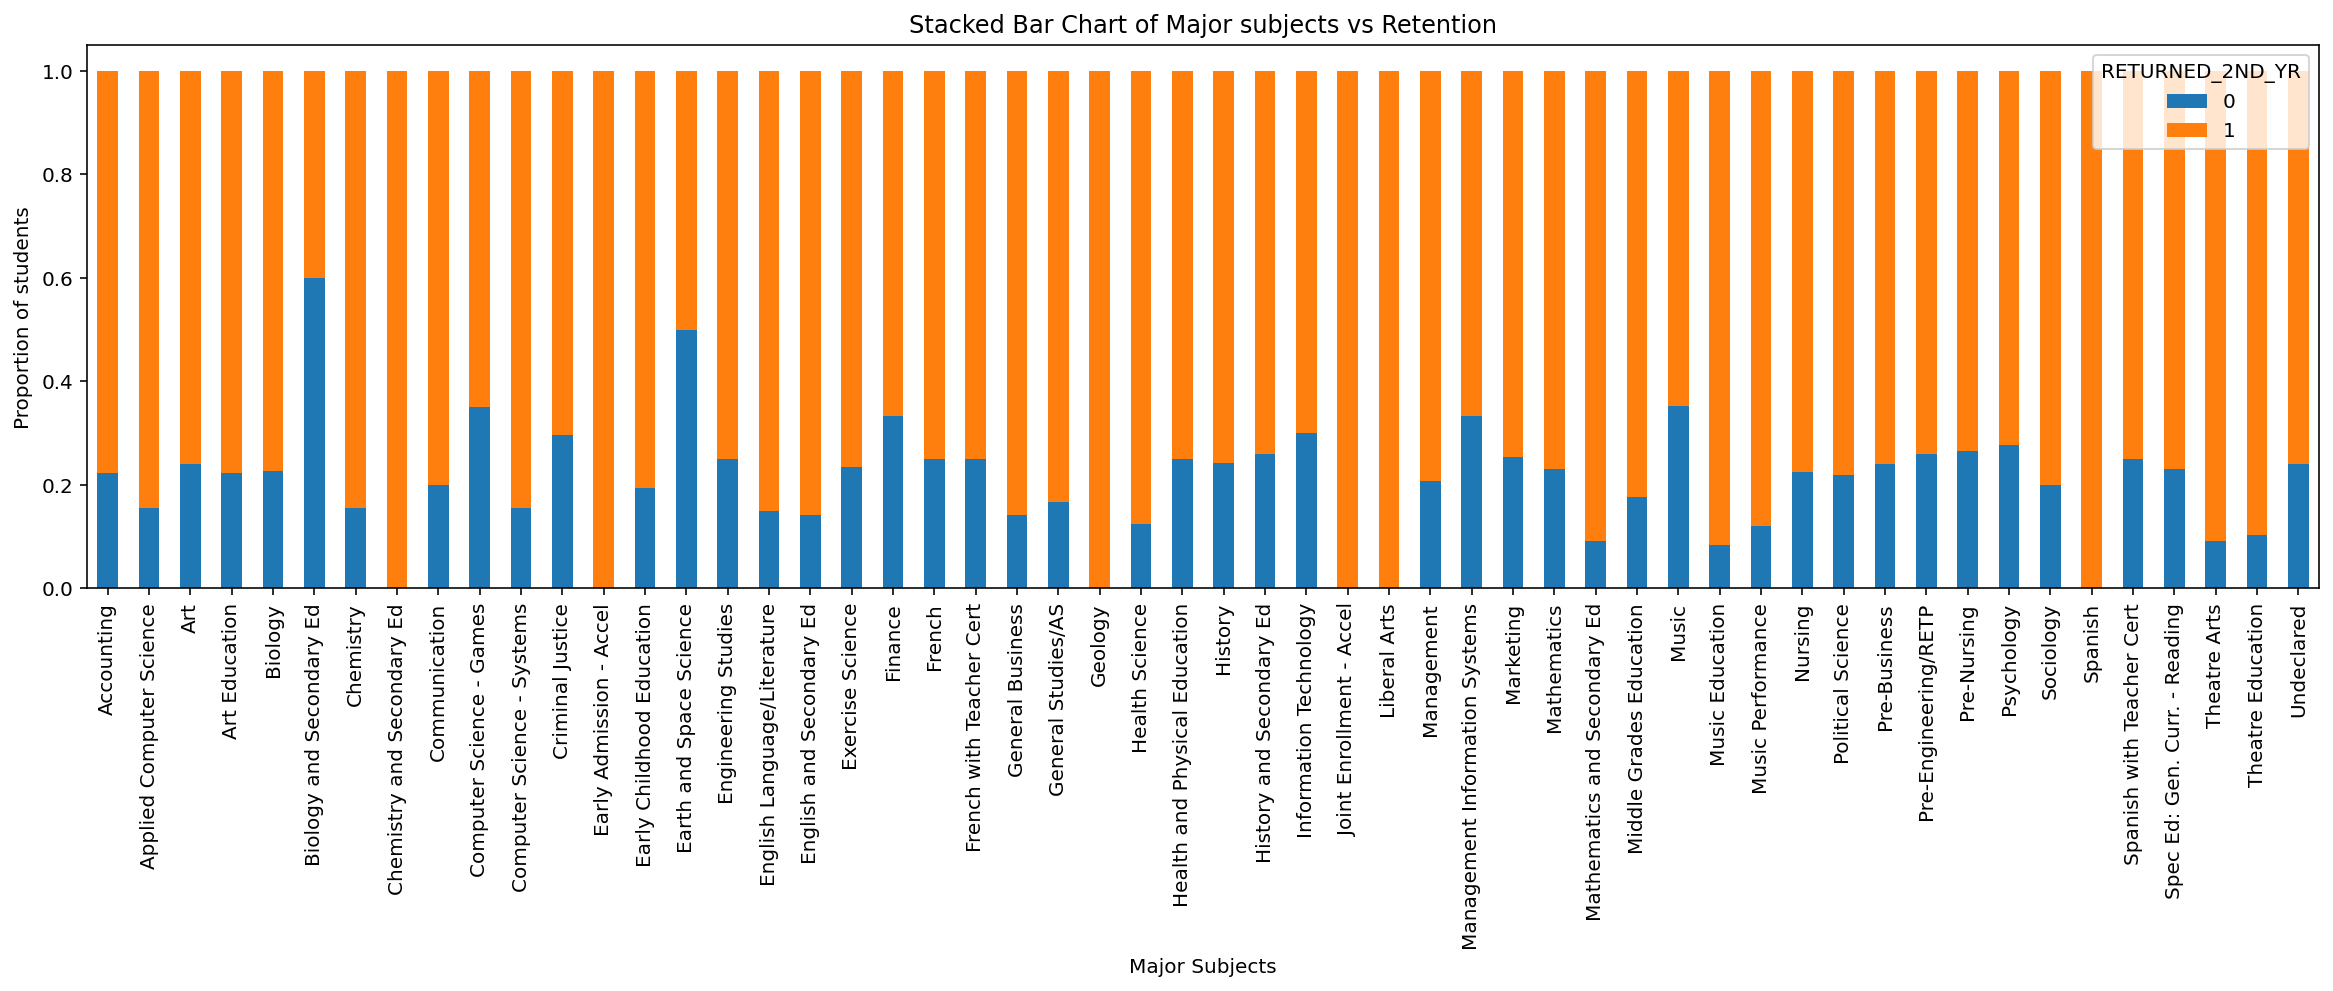

In [292]:
#Multivariate Analysis :
t1=pd.crosstab(data2.STDNT_MAJOR,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Major subjects vs Retention')
plt.xlabel('Major Subjects')
plt.ylabel('Proportion of students')

In [370]:
data

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,age_group
0,7808615,18,F,BGD 1,Y,Undeclared,N,NaN,1150.0,1150.0,...,No Information,16,16,14.0,14.0,0,0,0,0.0,On 18
1,7830063,19,F,BGD 1,N,Undeclared,N,26.0,NaN,1190.0,...,College/Beyond,18,18,18.0,18.0,570000,1355760,785760,459300.0,Above 18
2,7847538,18,M,BGD 1,Y,Mathematics,N,NaN,1020.0,1030.0,...,Other/Unknown,15,15,14.0,14.0,0,0,0,0.0,On 18
3,8006429,18,M,BGD 1,Y,Undeclared,N,NaN,1210.0,1220.0,...,College/Beyond,13,13,14.0,14.0,0,0,0,0.0,On 18
4,7962680,18,F,BGD 1,Y,Art,N,NaN,1200.0,1190.0,...,High School,12,12,12.0,12.0,835920,1355760,519840,278340.0,On 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,F,BGD 4,N,Music Performance,N,NaN,800.0,790.0,...,No Information,18,18,16.0,13.0,0,0,0,0.0,On 18
3396,8023055,18,F,BGD 1,Y,Biology,N,20.0,NaN,950.0,...,No Information,13,9,14.0,13.0,0,0,0,0.0,On 18
3397,7926915,18,F,BGD 4,Y,Biology,N,NaN,1020.0,1030.0,...,High School,14,6,14.0,13.0,0,945840,1288980,0.0,On 18
3398,7877332,18,F,BGD 3,Y,Joint Enrollment - Accel,N,21.0,NaN,990.0,...,College/Beyond,12,9,14.0,13.0,0,269100,0,-231720.0,On 18


In [12]:
#Removing subjects for which there is already retention :
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Chemistry and Secondary Ed']

In [13]:
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Early Admission - Accel']
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Geology']
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Joint Enrollment - Accel']
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Liberal Arts']
cdata=cdata.loc[cdata['STDNT_MAJOR']!='Spanish']

In [14]:
cdata.shape

(3350, 38)

In [15]:
cdata.dtypes

Unnamed: 0                    int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE_COMB      int64
FIRST_TERM                   object
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
SECOND_TERM                  object
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S         object
CORE_COURSE_GRADE_2_S        object
HOUSING_STS                  object
RETURNED_2ND_YR              object
DISTANCE_FROM_HOME            int64
HIGH_SCHL_GPA               float64
FATHER_HI_EDU_CD              int64
FATHER_HI_EDU_DESC           object
MOTHER_HI_EDU_CD              int64
MOTHER_HI_EDU_DESC          

Text(0, 0.5, 'Proportion of students')

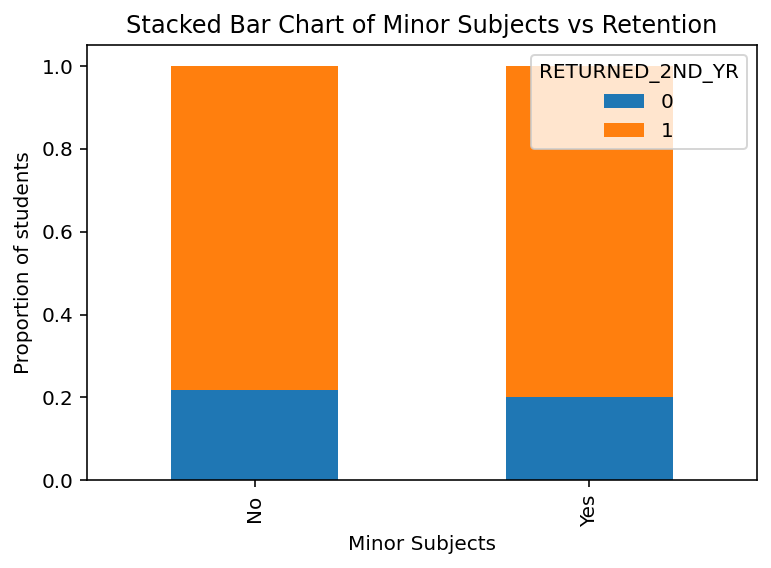

In [448]:
cdata['STDNT_MINOR']=np.where(cdata['STDNT_MINOR']!='N','Yes','No')

t1=pd.crosstab(cdata.STDNT_MINOR,cdata.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.title('Stacked Bar Chart of Minor Subjects vs Retention')
plt.xlabel('Minor Subjects')
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

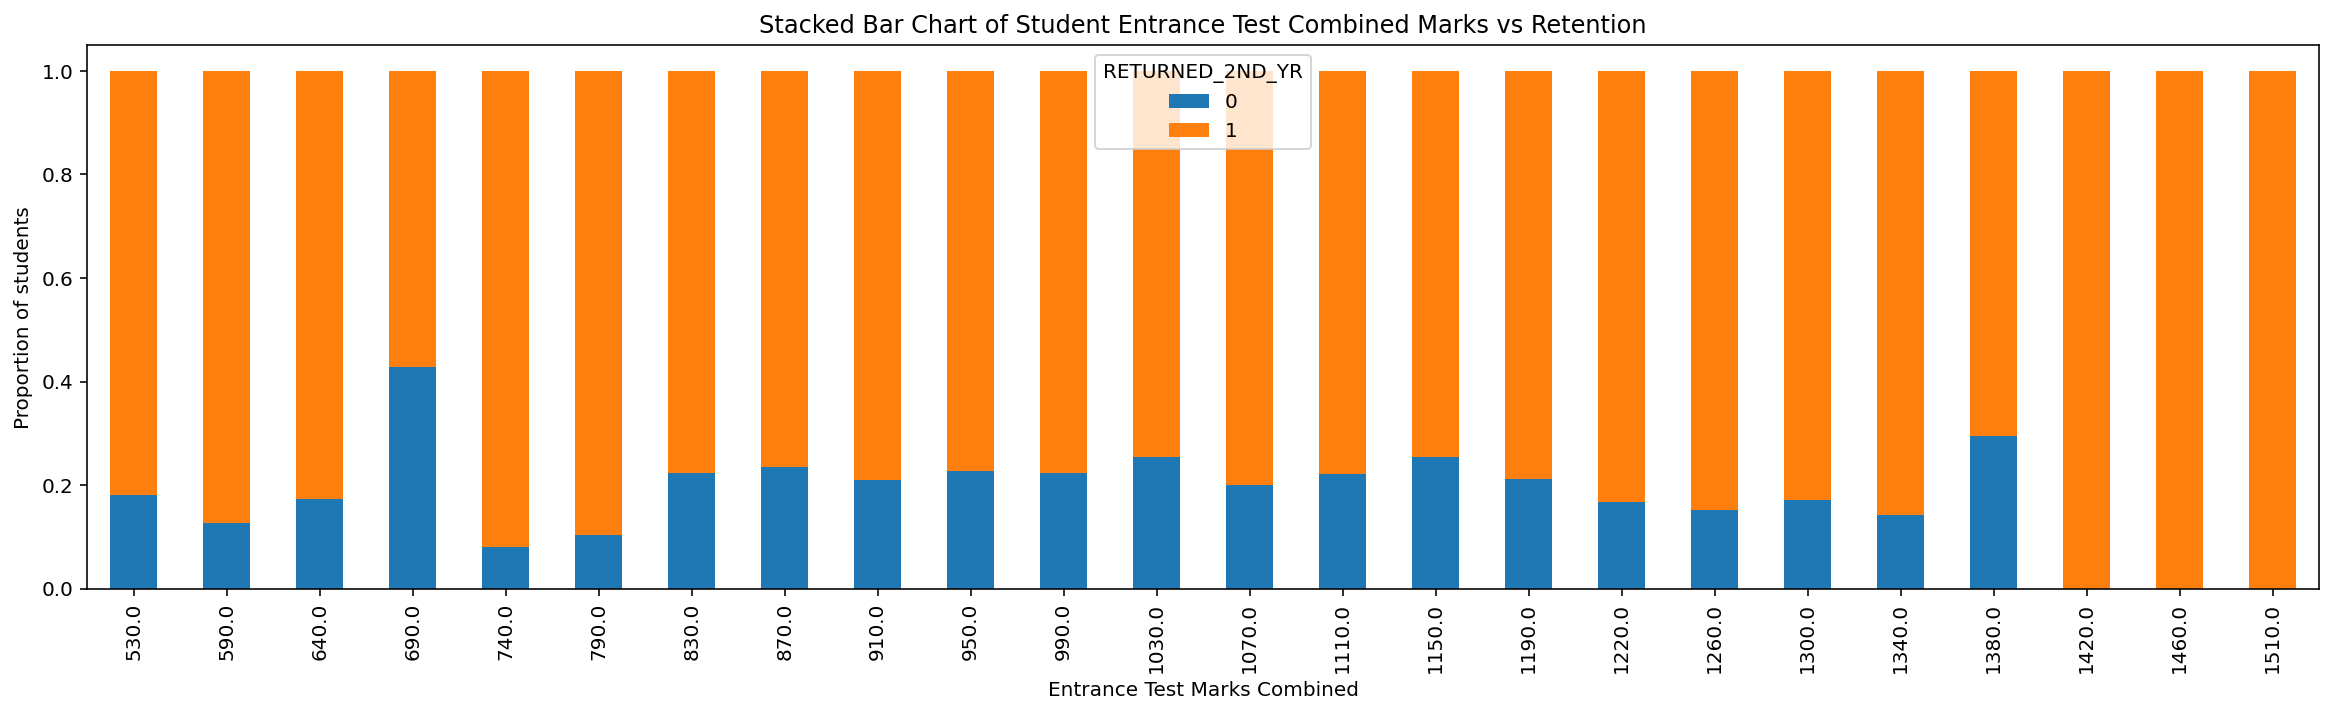

In [297]:
t1=pd.crosstab(data2.STDNT_TEST_ENTRANCE_COMB,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Student Entrance Test Combined Marks vs Retention')
plt.xlabel('Entrance Test Marks Combined')
plt.ylabel('Proportion of students')

In [16]:
cdata=cdata.loc[cdata['STDNT_TEST_ENTRANCE_COMB']!=1420.0]
cdata=cdata.loc[cdata['STDNT_TEST_ENTRANCE_COMB']!=1460.0]
cdata=cdata.loc[cdata['STDNT_TEST_ENTRANCE_COMB']!=1510.0]

Text(0, 0.5, 'Proportion of students')

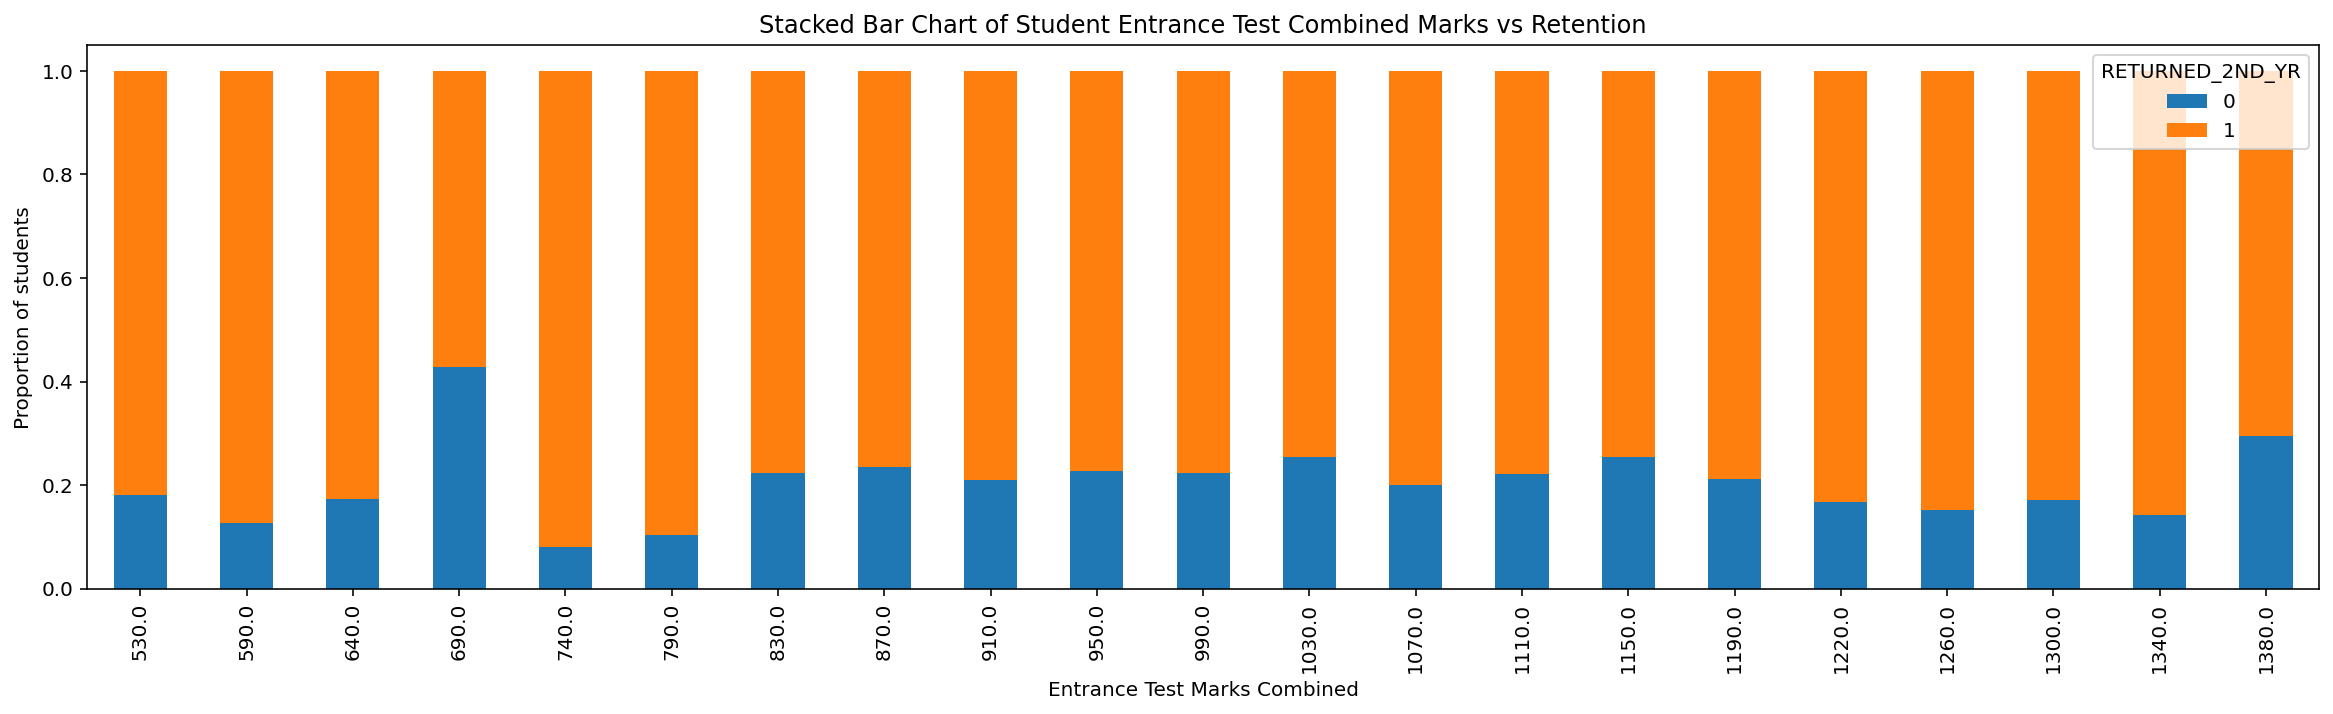

In [299]:
t1=pd.crosstab(data2.STDNT_TEST_ENTRANCE_COMB,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Student Entrance Test Combined Marks vs Retention')
plt.xlabel('Entrance Test Marks Combined')
plt.ylabel('Proportion of students')

In [450]:
cdata.shape

(3341, 37)

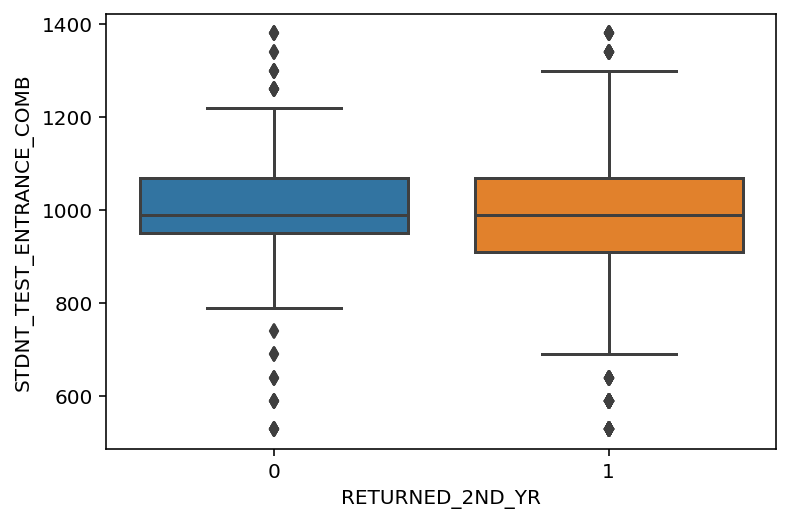

In [300]:
sns.boxplot(x="RETURNED_2ND_YR", y="STDNT_TEST_ENTRANCE_COMB", data=data2)

Text(0, 0.5, 'Proportion of students')

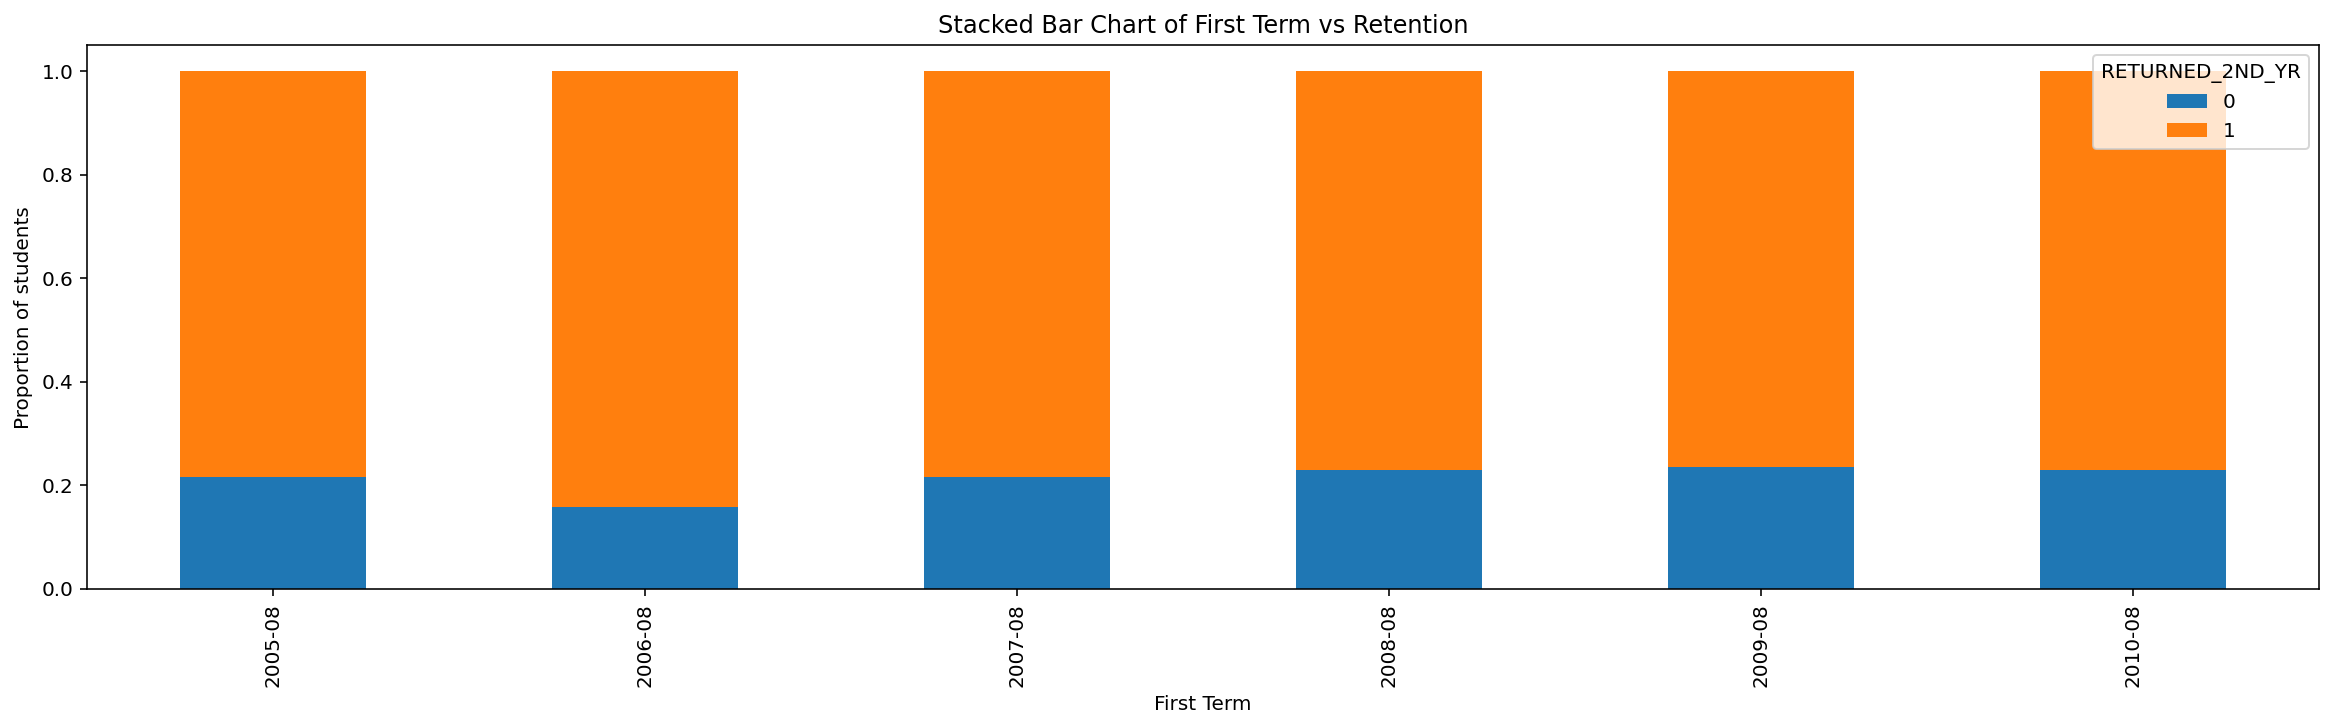

In [301]:
t1=pd.crosstab(data2.FIRST_TERM,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of First Term vs Retention')
plt.xlabel('First Term')
plt.ylabel('Proportion of students')

In [17]:
def subject_groups(cdata,sub):
    cdata[sub+'_GROUPED']=np.where(cdata[sub].str.contains("ANTH"), 'ANTH',
                                            np.where(cdata[sub].str.contains("ARAB"), 'ARAB',
                                            np.where(cdata[sub].str.contains("ARTH"), 'ARTH',
                                            np.where(cdata[sub].str.contains("ASTR"), 'ASTR',
                                            np.where(cdata[sub].str.contains("BIOL"), 'BIOL',
                                            np.where(cdata[sub].str.contains("CHEM"), 'CHEM',
                                            np.where(cdata[sub].str.contains("COMM"), 'COMM',
                                            np.where(cdata[sub].str.contains("CPSC"), 'CPSC',
                                            np.where(cdata[sub].str.contains("ECON"), 'ECON',
                                            np.where(cdata[sub].str.contains("ENGL"), 'ENGL',
                                            np.where(cdata[sub].str.contains("ENVS"), 'ENVS',
                                            np.where(cdata[sub].str.contains("FREN"), 'FREN',
                                            np.where(cdata[sub].str.contains("GEOG"), 'GEOG',
                                            np.where(cdata[sub].str.contains("GEOL"), 'GEOL',
                                            np.where(cdata[sub].str.contains("GERM"), 'GERM',
                                            np.where(cdata[sub].str.contains("HIST"), 'HIST',
                                            np.where(cdata[sub].str.contains("ITDS"), 'ITDS',
                                            np.where(cdata[sub].str.contains("JAPN"), 'JAPN',
                                            np.where(cdata[sub].str.contains("LATN"), 'LATN',
                                            np.where(cdata[sub].str.contains("LEAD"), 'LEAD',
                                            np.where(cdata[sub].str.contains("MATH"), 'MATH',
                                            np.where(cdata[sub].str.contains("MUSC"), 'MUSC',
                                            np.where(cdata[sub].str.contains("PHYS"), 'PHYS',
                                            np.where(cdata[sub].str.contains("POLS"), 'POLS',
                                            np.where(cdata[sub].str.contains("SOCI"), 'SOCI',
                                            np.where(cdata[sub].str.contains("SPAN"), 'SPAN',
                                            np.where(cdata[sub].str.contains("STAT"), 'STAT',
                                            np.where(cdata[sub].str.contains("THEA"), 'THEA',
                                            np.where(cdata[sub].str.contains("PSYC"), 'PSYC',
                                            cdata[sub])))))))))))))))))))))))))))))
    return cdata




In [18]:
cdata.drop('age_group',axis=1)

,Unnamed: 0,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,AGE_GROUP
0,0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,...,No Information,16,16,14,14,0,0,0,0.0,On 18
1,1,19,F,BGD 1,N,Undeclared,N,1190,2008-08,ANTH 1105,...,College/Beyond,18,18,18,18,570000,1355760,785760,459300.0,Above 18
2,2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,...,Other/Unknown,15,15,14,14,0,0,0,0.0,On 18
3,3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,...,College/Beyond,13,13,14,14,0,0,0,0.0,On 18
4,4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,...,High School,12,12,12,12,835920,1355760,519840,278340.0,On 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,3394,18,F,BGD 1,Y,Theatre Arts,N,990,2010-08,ENGL 1101,...,High School,13,3,14,13,0,0,0,0.0,On 18
3395,3395,18,F,BGD 4,N,Music Performance,N,790,2008-08,COMM 1110,...,No Information,18,18,16,13,0,0,0,0.0,On 18
3396,3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,...,No Information,13,9,14,13,0,0,0,0.0,On 18
3397,3397,18,F,BGD 4,Y,Biology,N,1030,2008-08,ENGL 1101,...,High School,14,6,14,13,0,945840,1288980,0.0,On 18


In [19]:
#Applying grouping function:
subject_groups(cdata,'CORE_COURSE_NAME_1_F')
subject_groups(cdata,'CORE_COURSE_NAME_2_F')
subject_groups(cdata,'CORE_COURSE_NAME_3_F')
subject_groups(cdata,'CORE_COURSE_NAME_1_S')
subject_groups(cdata,'CORE_COURSE_NAME_2_S')

,Unnamed: 0,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,AGE_GROUP,age_group,CORE_COURSE_NAME_1_F_GROUPED,CORE_COURSE_NAME_2_F_GROUPED,CORE_COURSE_NAME_3_F_GROUPED,CORE_COURSE_NAME_1_S_GROUPED,CORE_COURSE_NAME_2_S_GROUPED
0,0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,...,0,0,0.0,On 18,On 18,ANTH,ARTH,ENGL,CHEM,CHEM
1,1,19,F,BGD 1,N,Undeclared,N,1190,2008-08,ANTH 1105,...,1355760,785760,459300.0,Above 18,Above 18,ANTH,GERM,ITDS,ECON,ENGL
2,2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,...,0,0,0.0,On 18,On 18,ANTH,ENGL,HIST,ENGL,ENVS
3,3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,...,0,0,0.0,On 18,On 18,ANTH,COMM,ENGL,ENGL,HIST
4,4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,...,1355760,519840,278340.0,On 18,On 18,ANTH,ARTH,CPSC,COMM,ENGL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,3394,18,F,BGD 1,Y,Theatre Arts,N,990,2010-08,ENGL 1101,...,0,0,0.0,On 18,On 18,ENGL,PSYC,ENGL,ENGL,ENGL
3395,3395,18,F,BGD 4,N,Music Performance,N,790,2008-08,COMM 1110,...,0,0,0.0,On 18,On 18,COMM,ENGL,ENGL,ENGL,ENGL
3396,3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,...,0,0,0.0,On 18,On 18,POLS,ENGL,ENGL,POLS,ENGL
3397,3397,18,F,BGD 4,Y,Biology,N,1030,2008-08,ENGL 1101,...,945840,1288980,0.0,On 18,On 18,ENGL,ENGL,ENGL,ENGL,ENGL


Text(0, 0.5, 'Proportion of students')

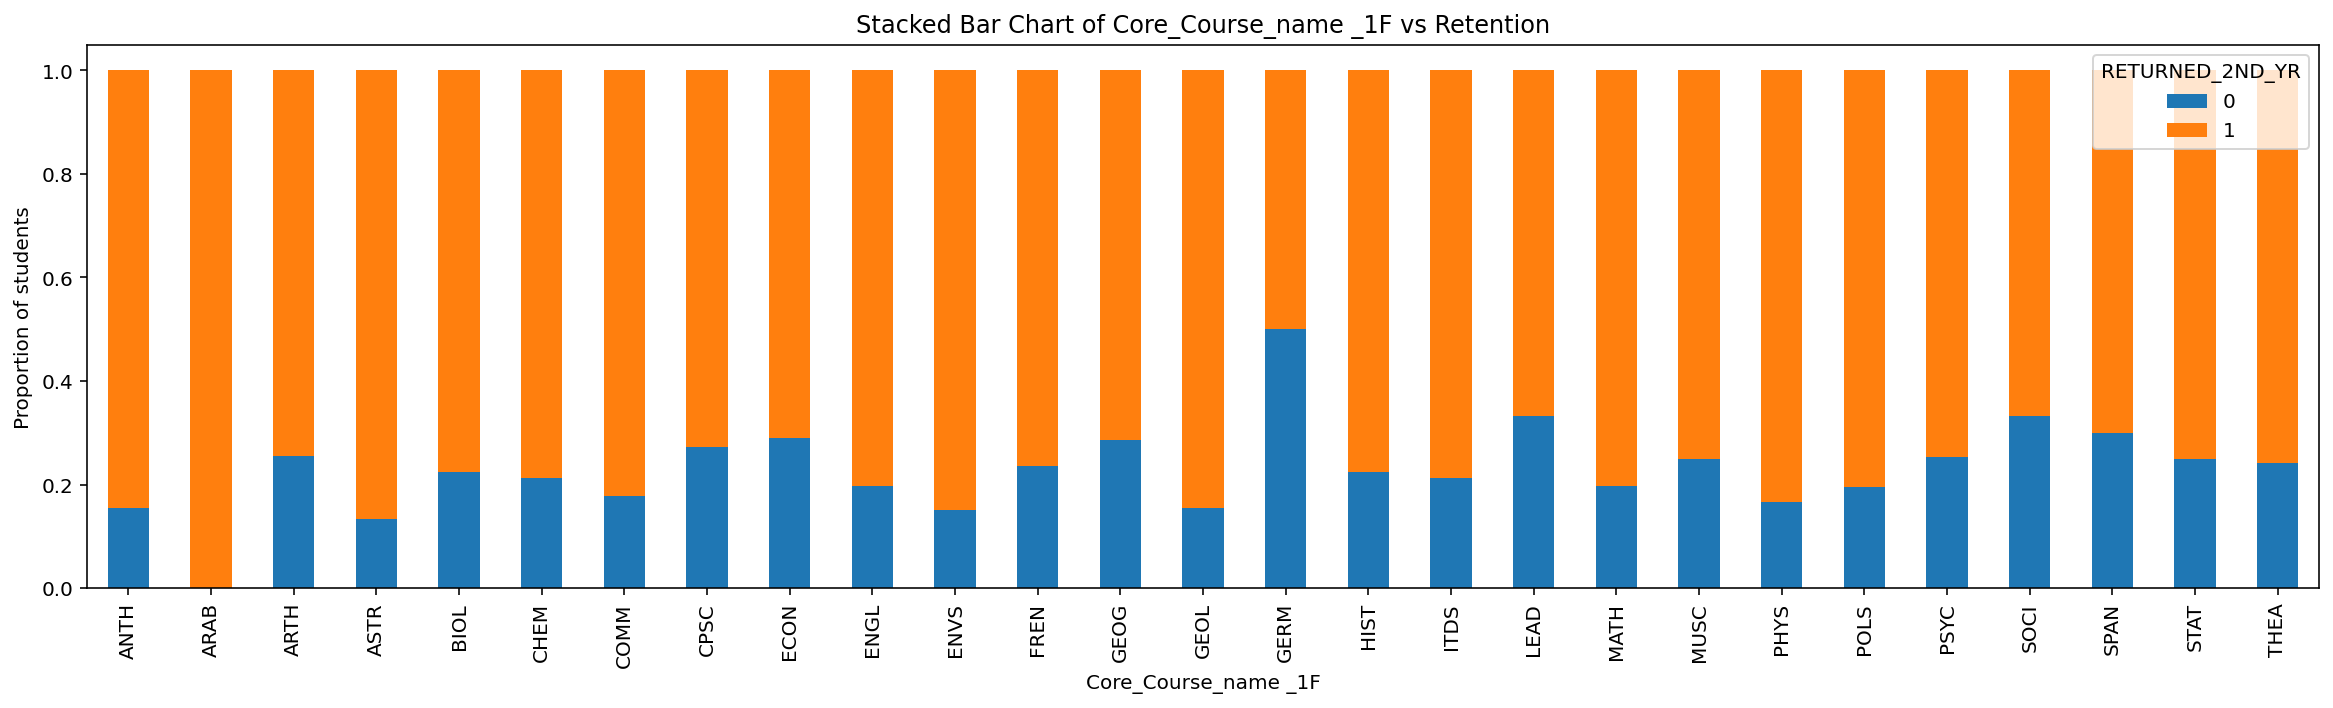

In [305]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_1_F_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _1F vs Retention')
plt.xlabel('Core_Course_name _1F')
plt.ylabel('Proportion of students')


In [398]:
cdata

,Unnamed: 0,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,AGE_GROUP,age_group,CORE_COURSE_NAME_1_F_GROUPED,CORE_COURSE_NAME_2_F_GROUPED,CORE_COURSE_NAME_3_F_GROUPED,CORE_COURSE_NAME_1_S_GROUPED,CORE_COURSE_NAME_2_S_GROUPED
0,0,18,F,BGD 1,Y,Undeclared,Yes,1150,2007-08,ANTH 1105,...,0,0,0.0,On 18,On 18,ANTH,ARTH,ENGL,CHEM,CHEM
1,1,19,F,BGD 1,N,Undeclared,Yes,1190,2008-08,ANTH 1105,...,1355760,785760,459300.0,Above 18,Above 18,ANTH,GERM,ITDS,ECON,ENGL
2,2,18,M,BGD 1,Y,Mathematics,Yes,1030,2010-08,ANTH 1105,...,0,0,0.0,On 18,On 18,ANTH,ENGL,HIST,ENGL,ENVS
3,3,18,M,BGD 1,Y,Undeclared,Yes,1220,2007-08,ANTH 1107,...,0,0,0.0,On 18,On 18,ANTH,COMM,ENGL,ENGL,HIST
4,4,18,F,BGD 1,Y,Art,Yes,1190,2008-08,ANTH 1107,...,1355760,519840,278340.0,On 18,On 18,ANTH,ARTH,CPSC,COMM,ENGL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,3394,18,F,BGD 1,Y,Theatre Arts,Yes,990,2010-08,ENGL 1101,...,0,0,0.0,On 18,On 18,ENGL,PSYC,ENGL,ENGL,ENGL
3395,3395,18,F,BGD 4,N,Music Performance,Yes,790,2008-08,COMM 1110,...,0,0,0.0,On 18,On 18,COMM,ENGL,ENGL,ENGL,ENGL
3396,3396,18,F,BGD 1,Y,Biology,Yes,950,2007-08,POLS 1101,...,0,0,0.0,On 18,On 18,POLS,ENGL,ENGL,POLS,ENGL
3397,3397,18,F,BGD 4,Y,Biology,Yes,1030,2008-08,ENGL 1101,...,945840,1288980,0.0,On 18,On 18,ENGL,ENGL,ENGL,ENGL,ENGL


In [20]:
#removing ARAB:
cdata=cdata.loc[cdata['CORE_COURSE_NAME_1_F_GROUPED']!='ARAB']

Text(0, 0.5, 'Proportion of students')

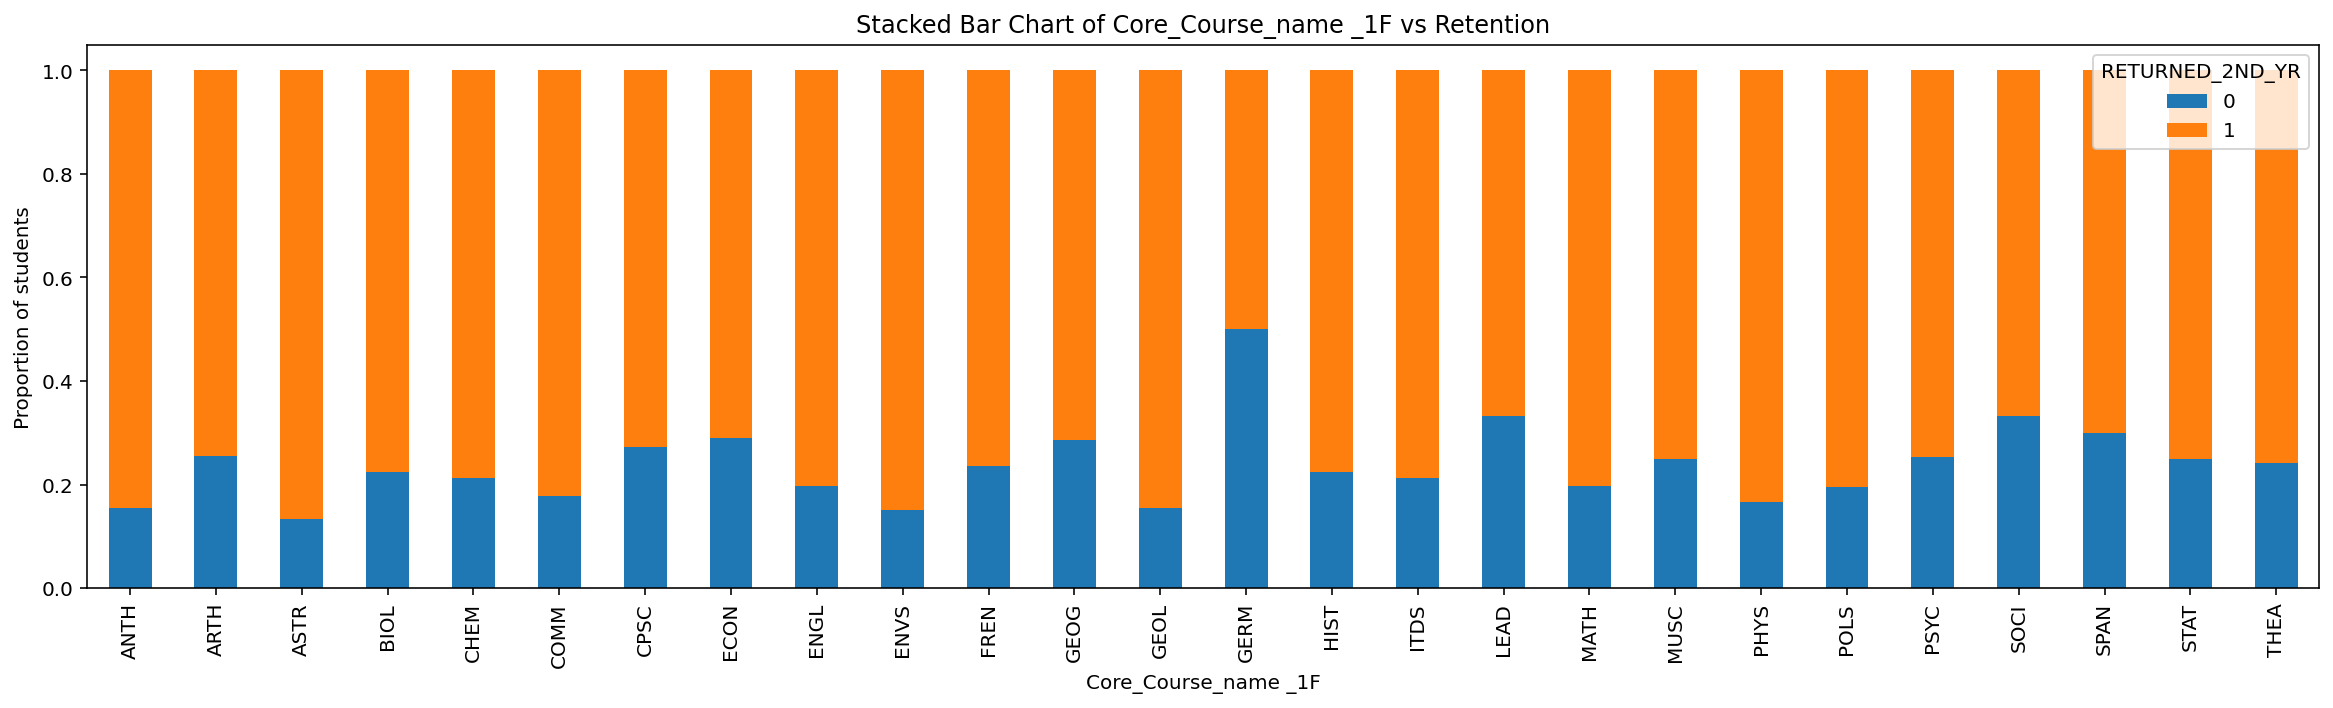

In [307]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_1_F_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _1F vs Retention')
plt.xlabel('Core_Course_name _1F')
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

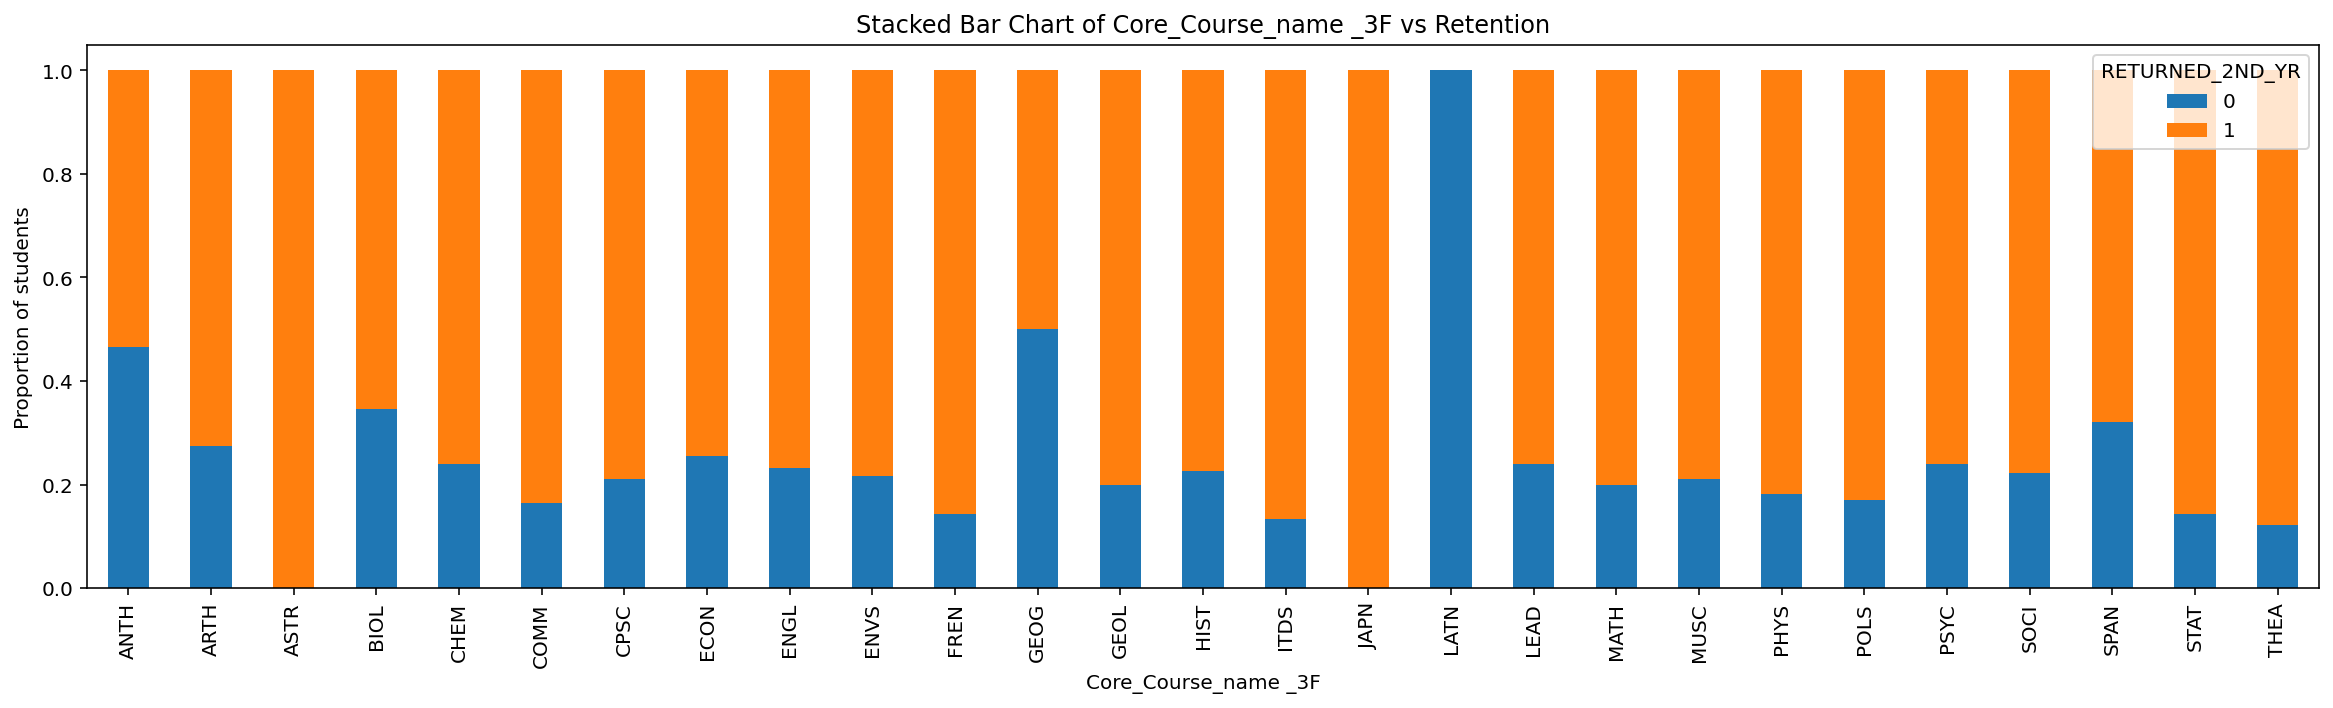

In [308]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_3_F_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _3F vs Retention')
plt.xlabel('Core_Course_name _3F')
plt.ylabel('Proportion of students')


In [21]:
#Removing ASTR,JAPN :
cdata=cdata.loc[cdata['CORE_COURSE_NAME_3_F_GROUPED']!='ASTR']
cdata=cdata.loc[cdata['CORE_COURSE_NAME_3_F_GROUPED']!='JAPN']

Text(0, 0.5, 'Proportion of students')

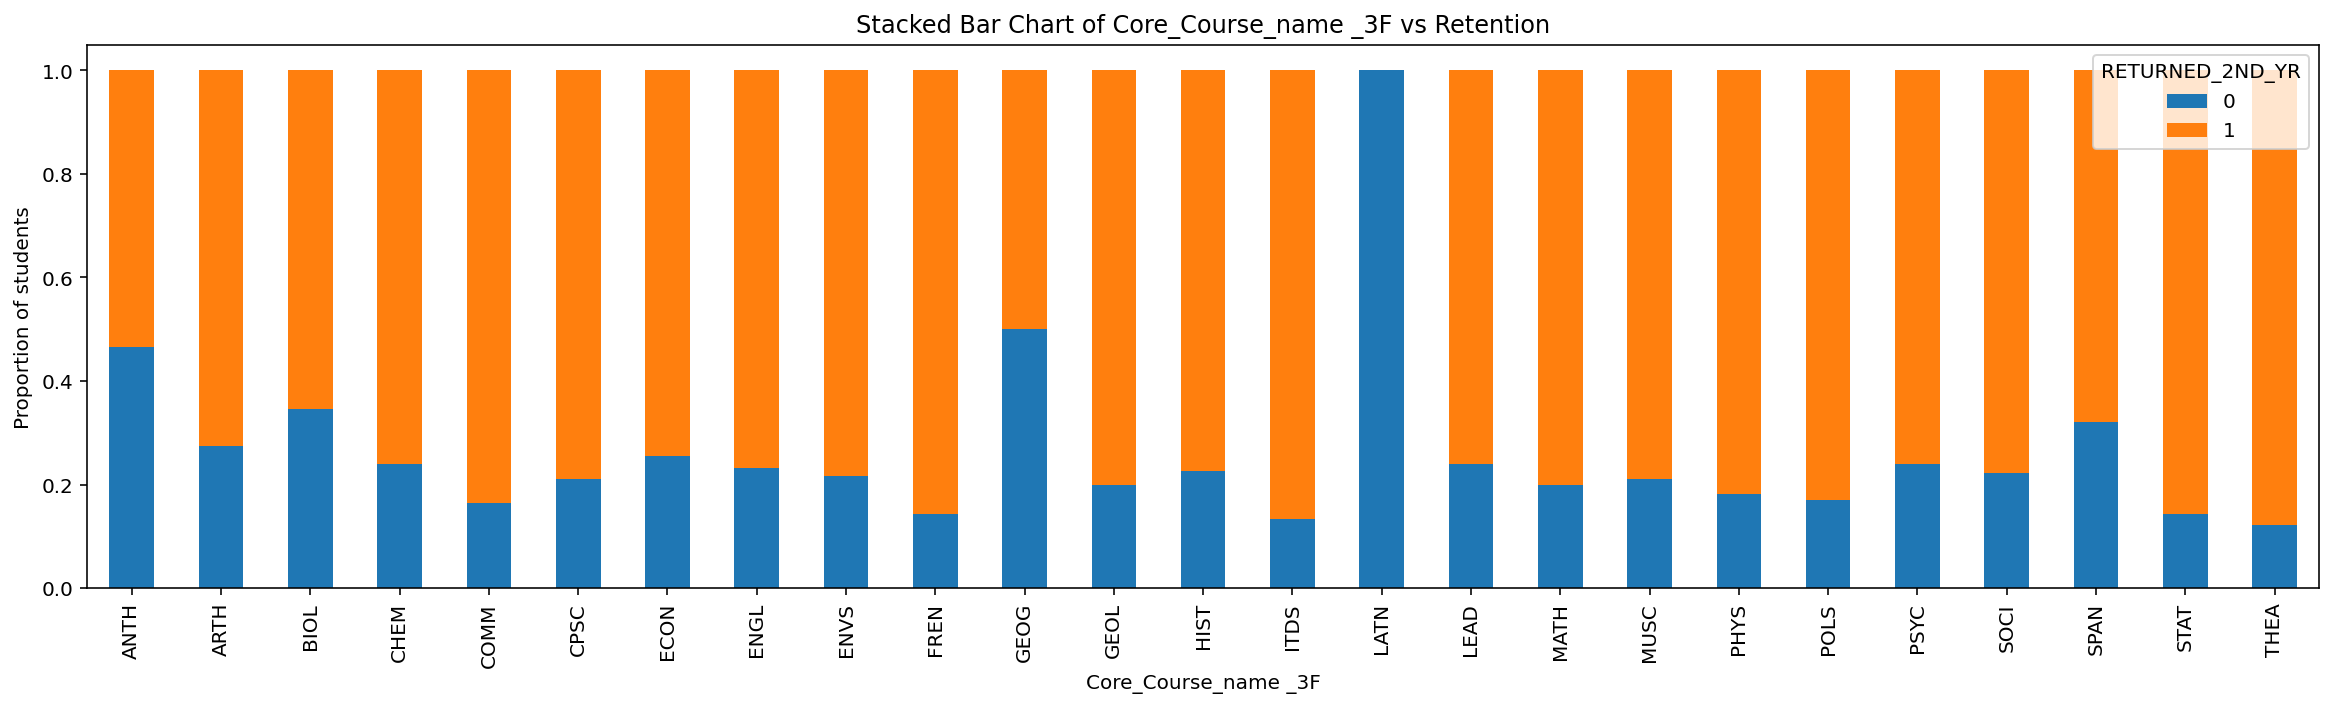

In [310]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_3_F_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _3F vs Retention')
plt.xlabel('Core_Course_name _3F')
plt.ylabel('Proportion of students')


Text(0, 0.5, 'Proportion of students')

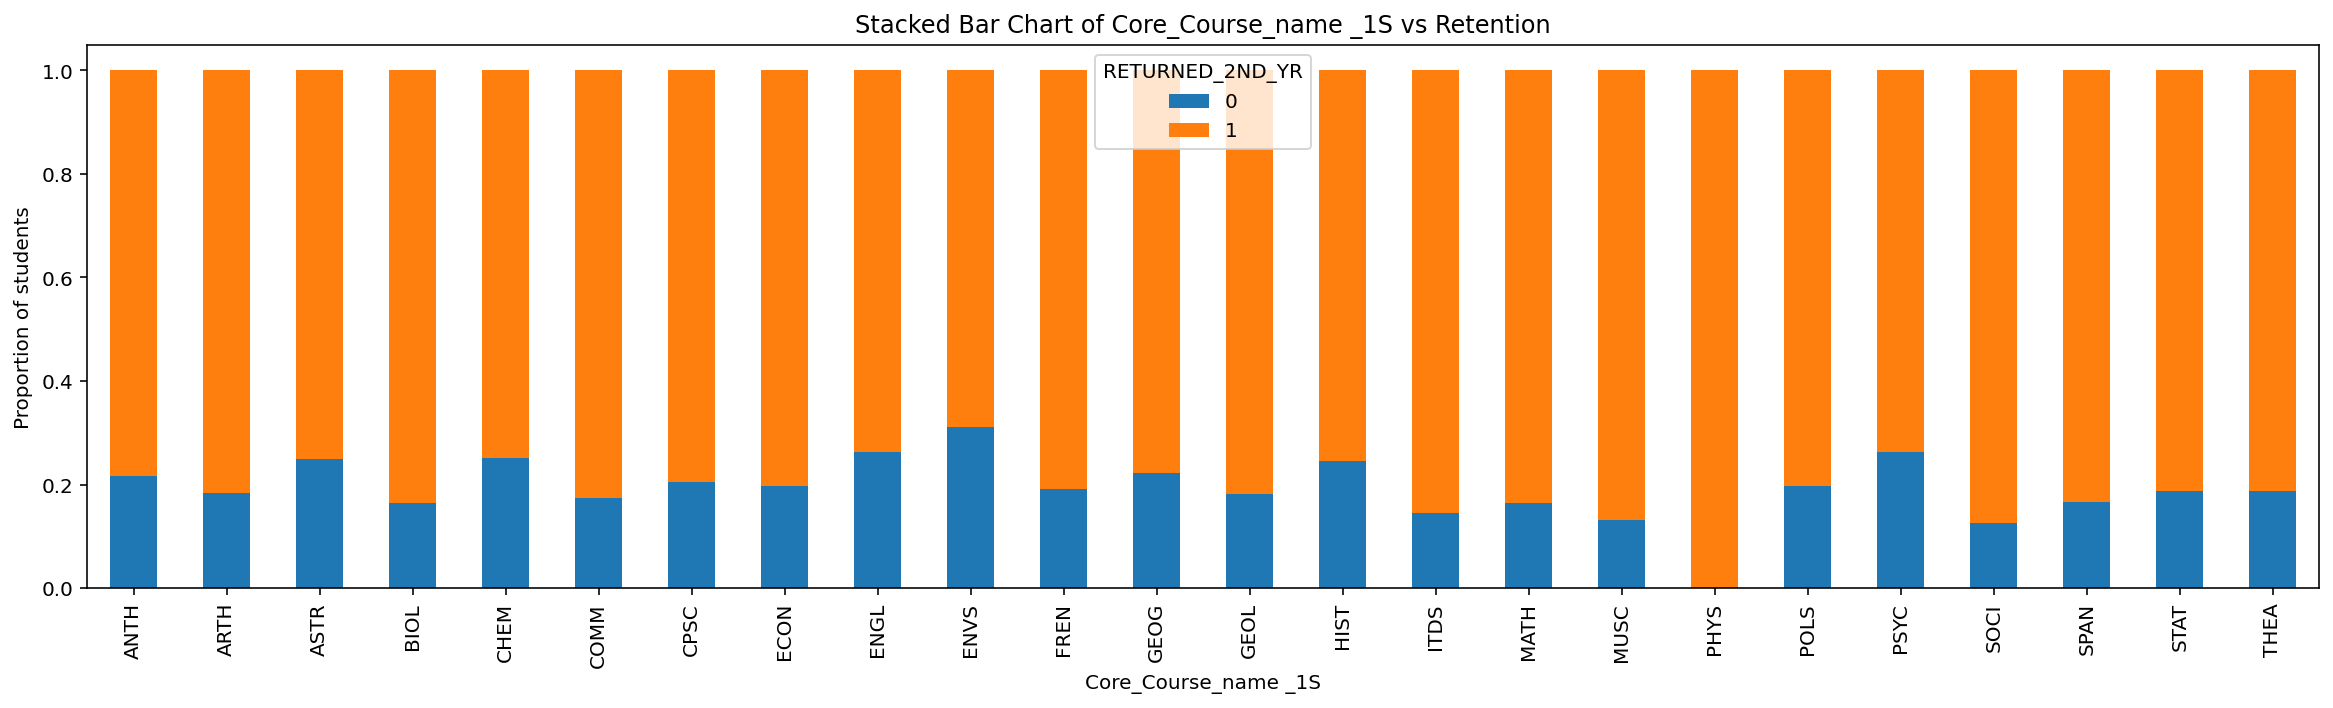

In [245]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_1_S_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _1S vs Retention')
plt.xlabel('Core_Course_name _1S')
plt.ylabel('Proportion of students')

In [22]:
cdata=cdata.loc[cdata['CORE_COURSE_NAME_1_S_GROUPED']!='PHYS']

Text(0, 0.5, 'Proportion of students')

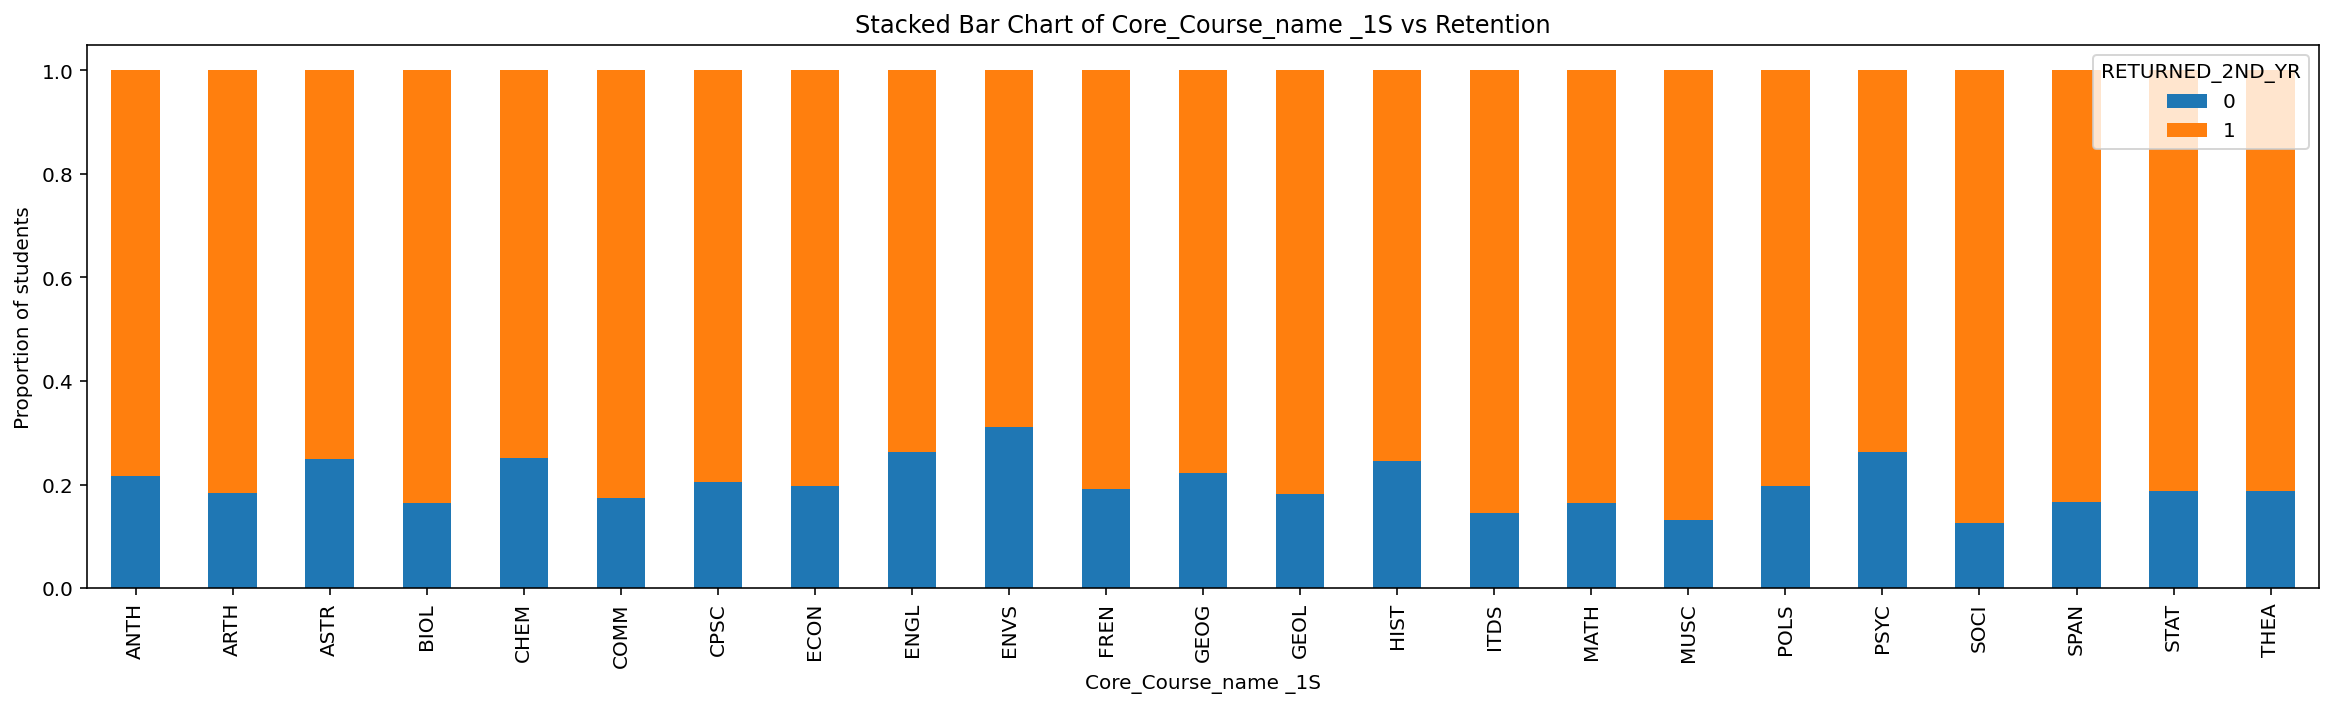

In [312]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_1_S_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _1S vs Retention')
plt.xlabel('Core_Course_name _1S')
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

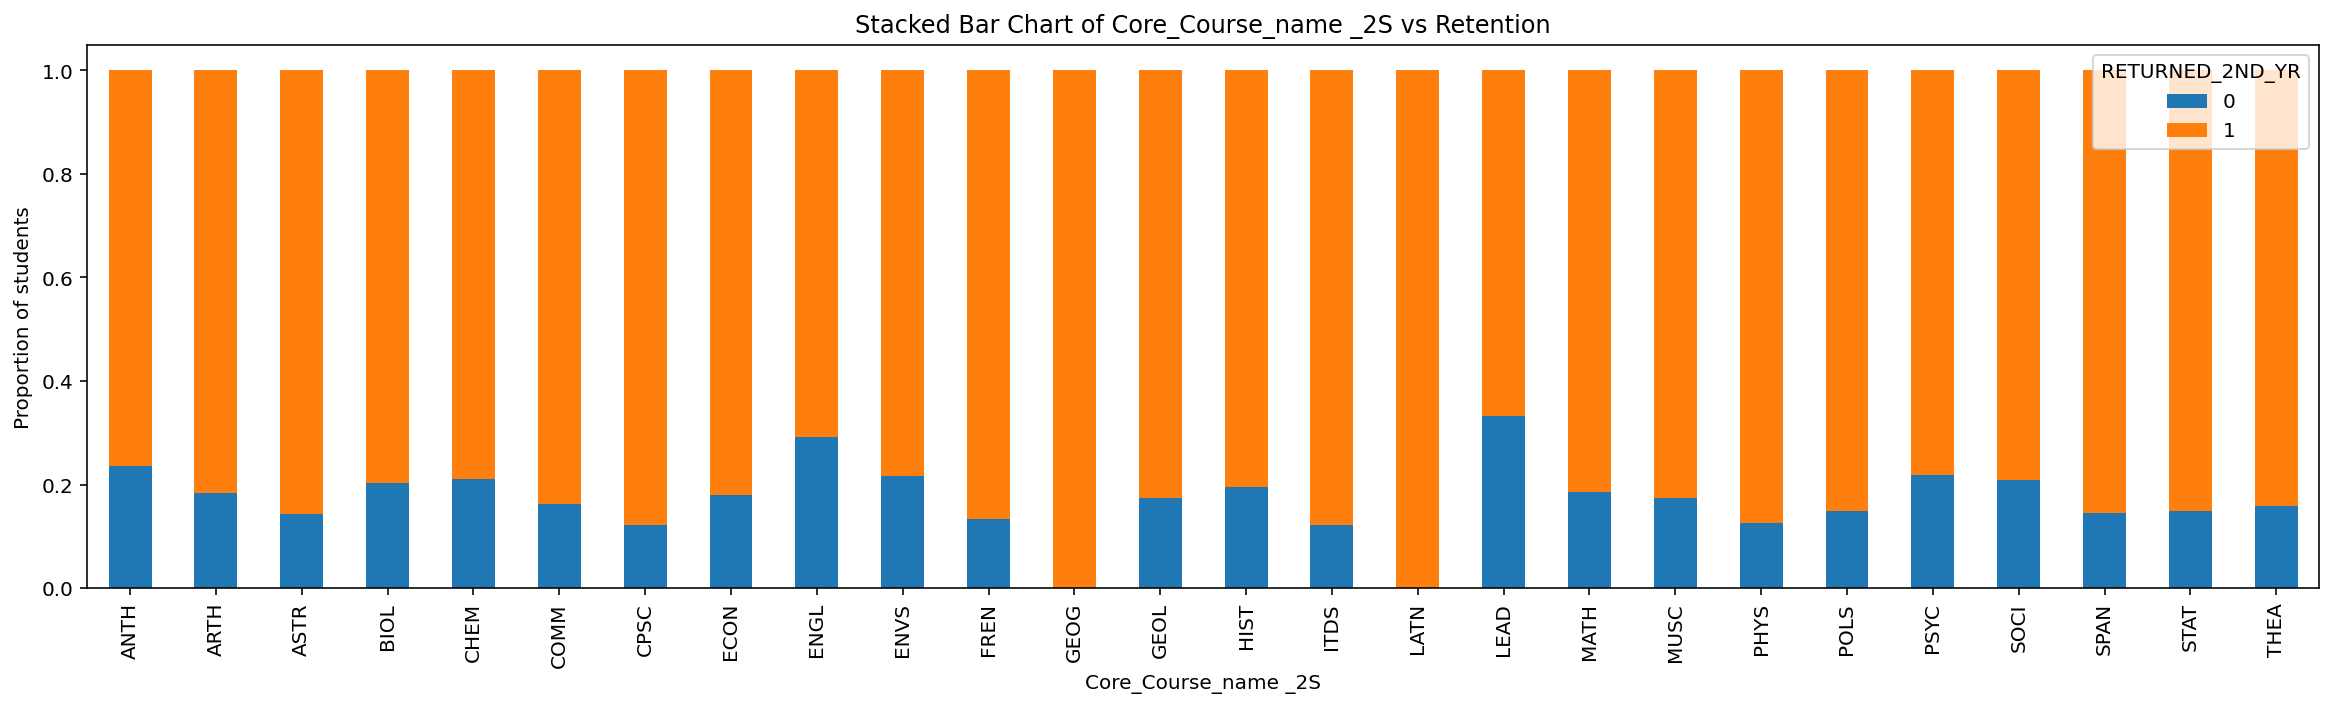

In [248]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_2_S_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _2S vs Retention')
plt.xlabel('Core_Course_name _2S')
plt.ylabel('Proportion of students')

In [23]:
cdata=cdata.loc[cdata['CORE_COURSE_NAME_2_S_GROUPED']!='GEOG']
cdata=cdata.loc[cdata['CORE_COURSE_NAME_2_S_GROUPED']!='LATN']


Text(0, 0.5, 'Proportion of students')

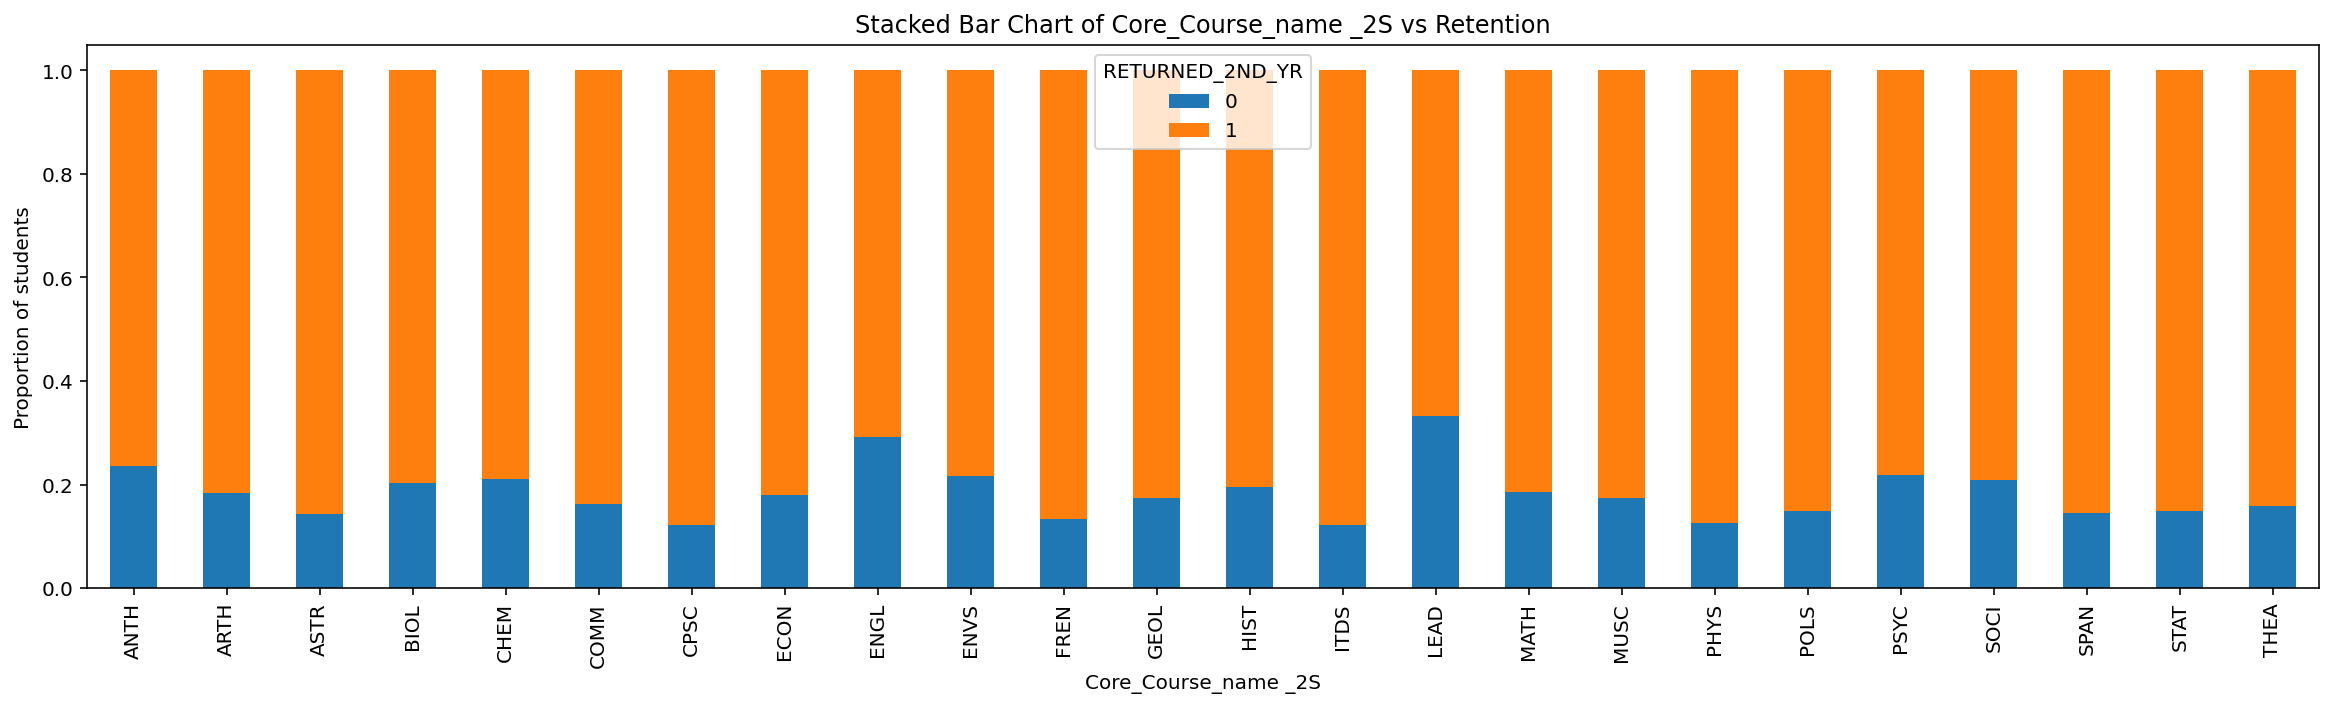

In [314]:
t1=pd.crosstab(data2.CORE_COURSE_NAME_2_S_GROUPED,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Stacked Bar Chart of Core_Course_name _2S vs Retention')
plt.xlabel('Core_Course_name _2S')
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

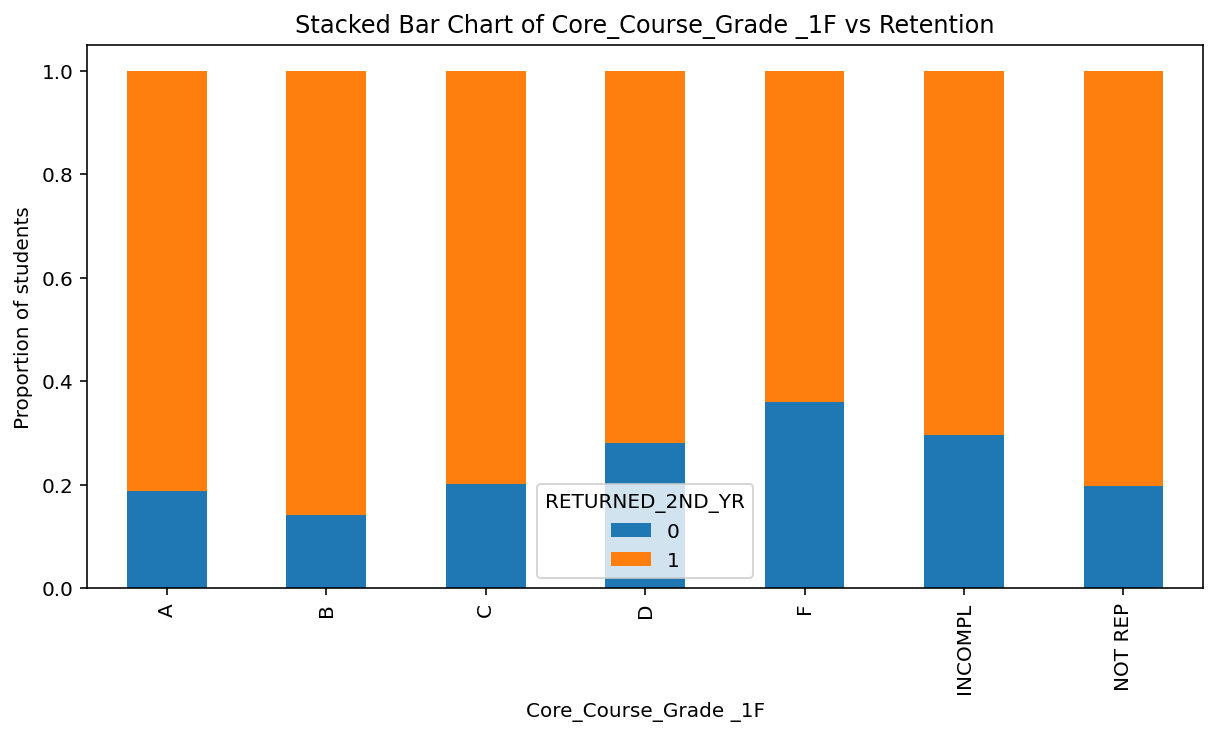

In [251]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_1_F,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('Stacked Bar Chart of Core_Course_Grade _1F vs Retention')
plt.xlabel('Core_Course_Grade _1F')
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

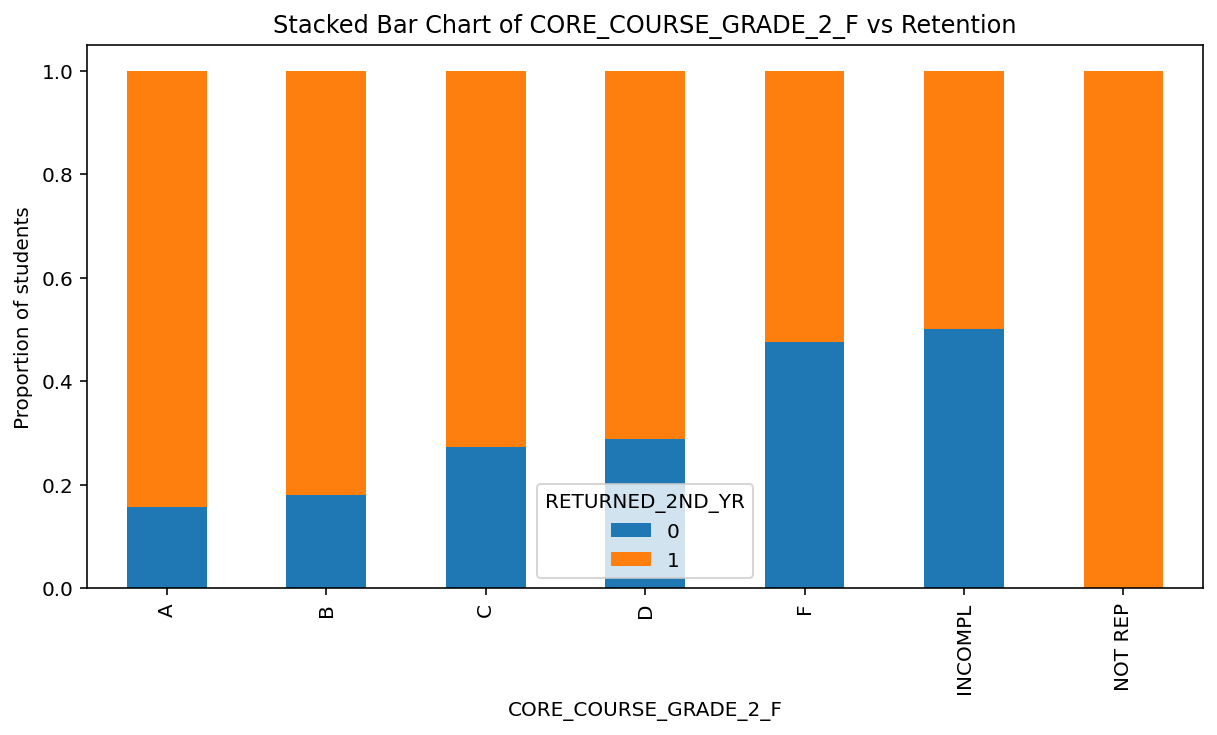

In [316]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_2_F,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_2_F vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_2_F') 
plt.ylabel('Proportion of students')

In [24]:
cdata=cdata.loc[cdata['CORE_COURSE_GRADE_2_F']!='NOT REP']

Text(0, 0.5, 'Proportion of students')

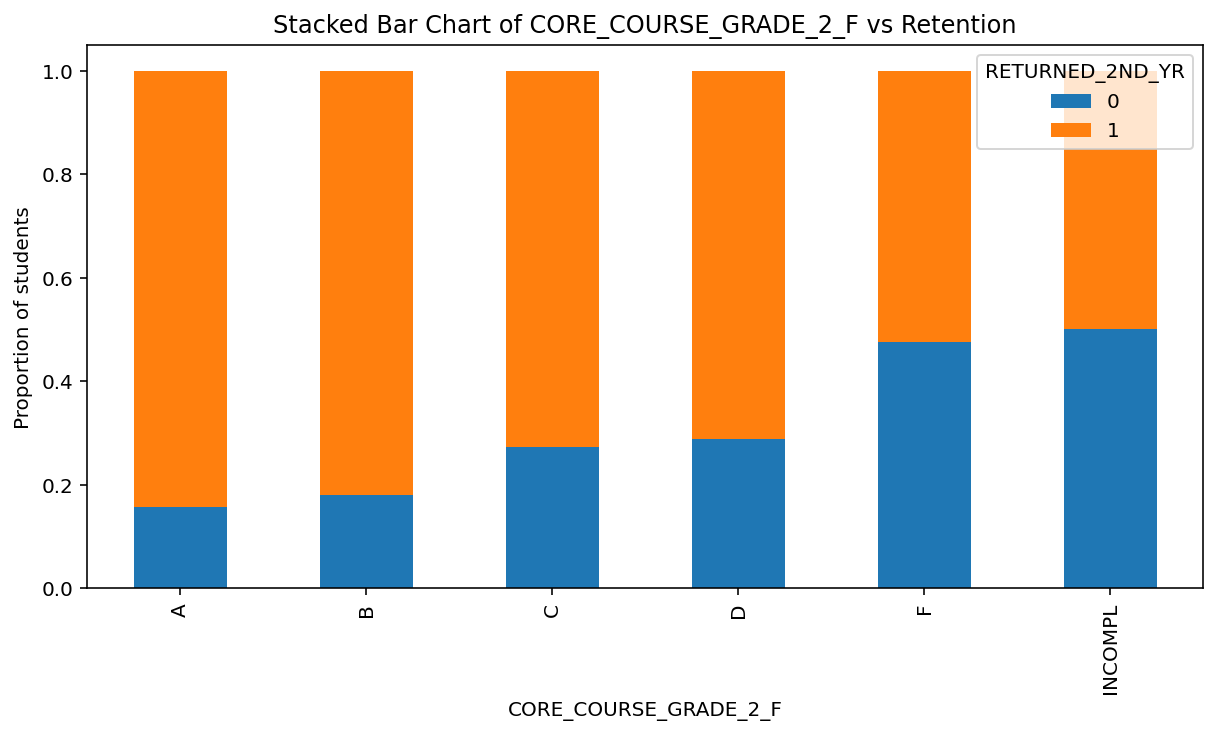

In [253]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_2_F,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_2_F vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_2_F') 
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

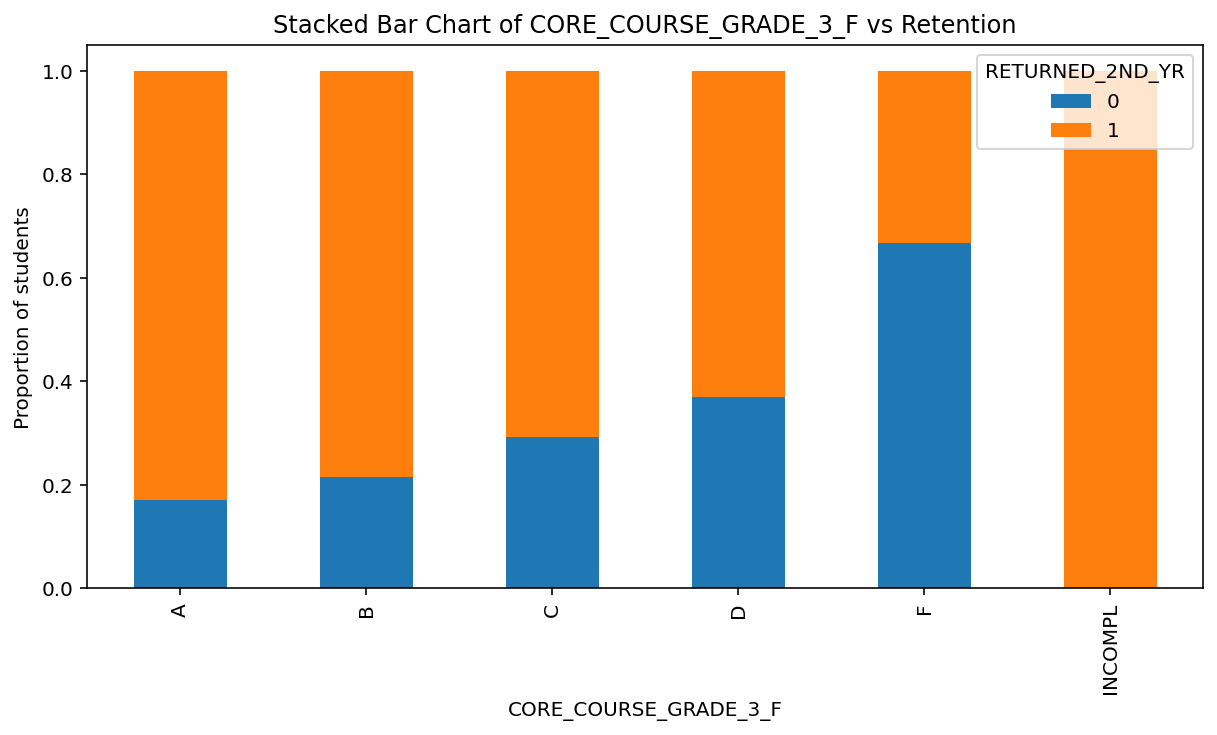

In [318]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_3_F,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_3_F vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_3_F') 
plt.ylabel('Proportion of students')

In [25]:
cdata=cdata.loc[cdata['CORE_COURSE_GRADE_3_F']!='INCOMPL']

Text(0, 0.5, 'Proportion of students')

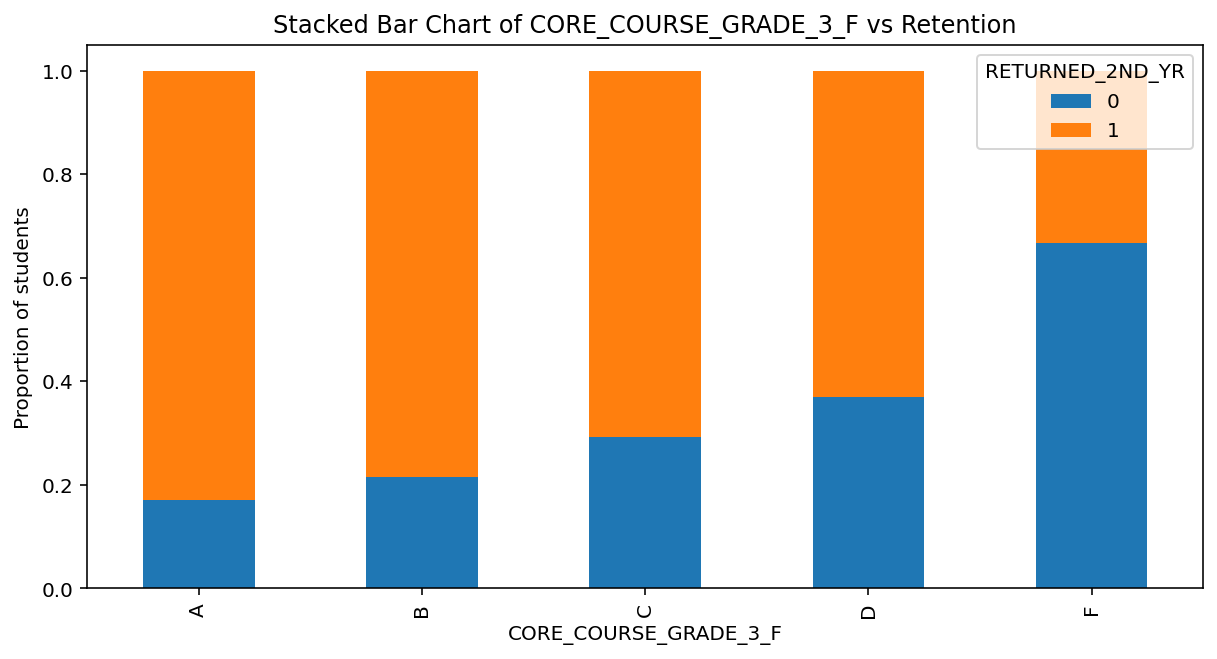

In [320]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_3_F,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_3_F vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_3_F') 
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

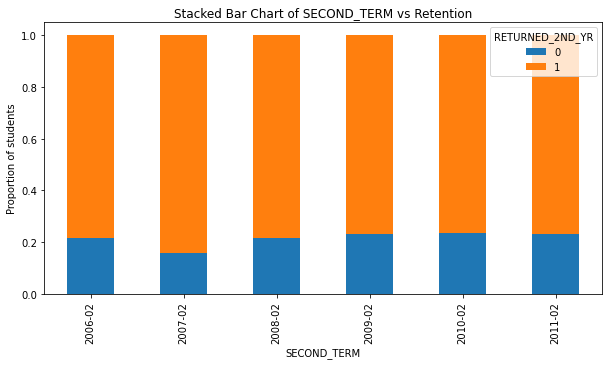

In [158]:
t1=pd.crosstab(data2.SECOND_TERM,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of SECOND_TERM vs Retention') 
plt.xlabel('SECOND_TERM') 
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

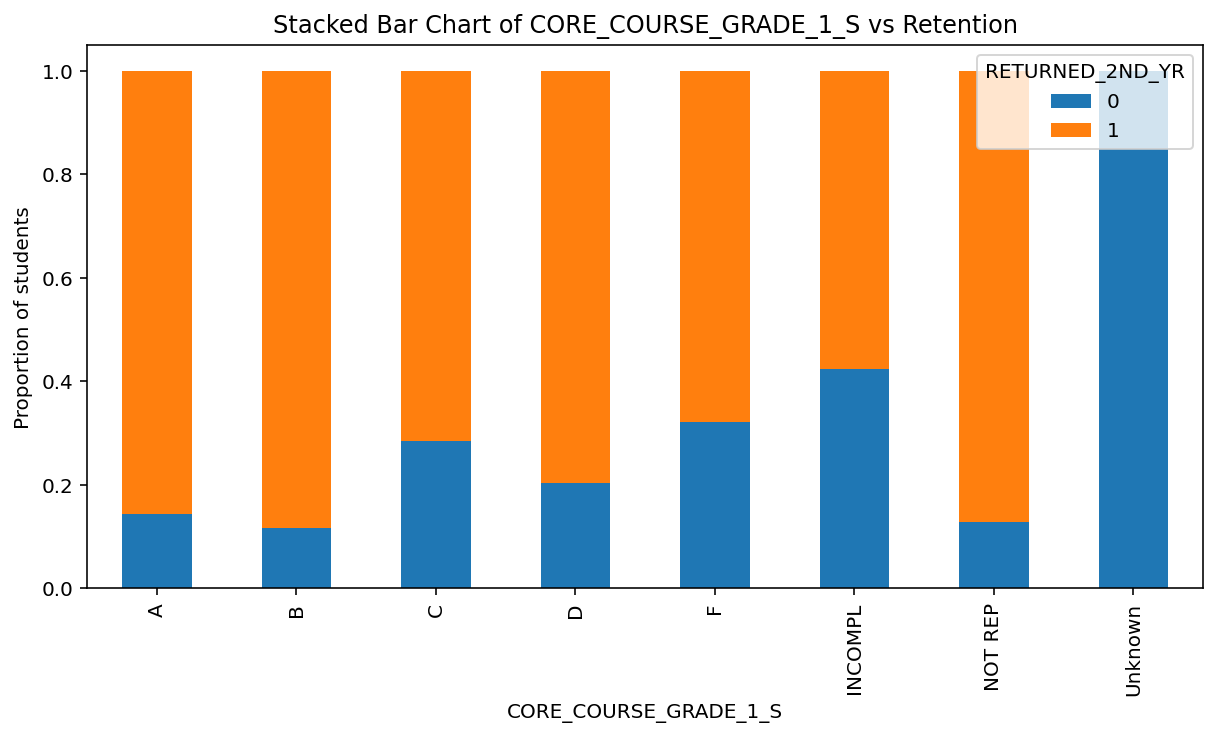

In [321]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_1_S,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_1_S vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_1_S') 
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

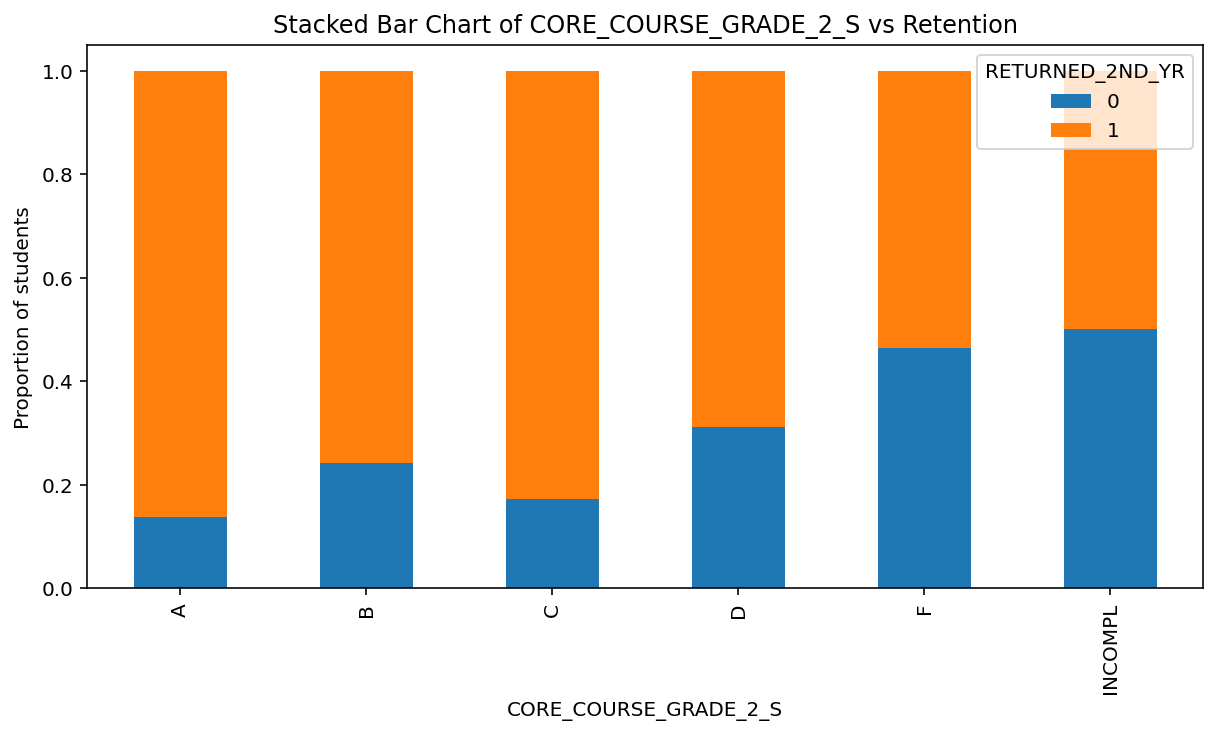

In [322]:
t1=pd.crosstab(data2.CORE_COURSE_GRADE_2_S,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of CORE_COURSE_GRADE_2_S vs Retention') 
plt.xlabel('CORE_COURSE_GRADE_2_S') 
plt.ylabel('Proportion of students')

Text(0, 0.5, 'Proportion of students')

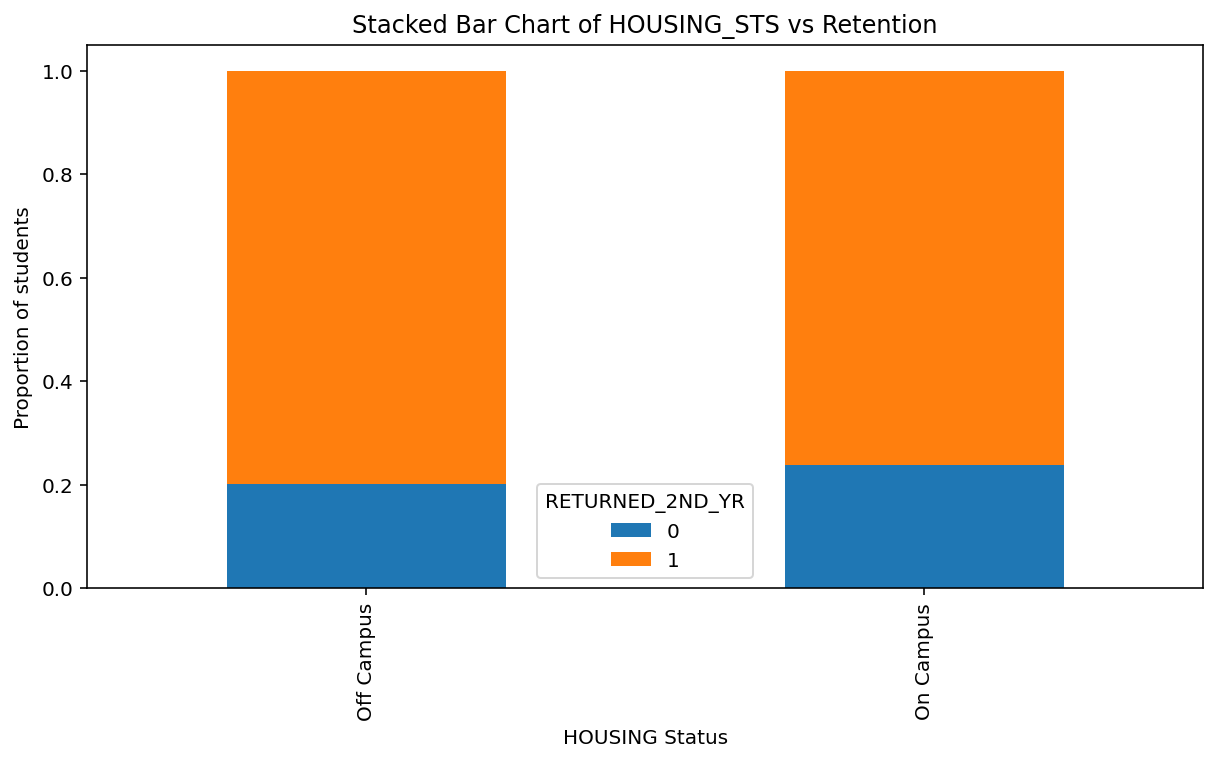

In [323]:
t1=pd.crosstab(data2.HOUSING_STS,data2.RETURNED_2ND_YR) 
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,5)) 
plt.title('Stacked Bar Chart of HOUSING_STS vs Retention') 
plt.xlabel('HOUSING Status') 
plt.ylabel('Proportion of students')

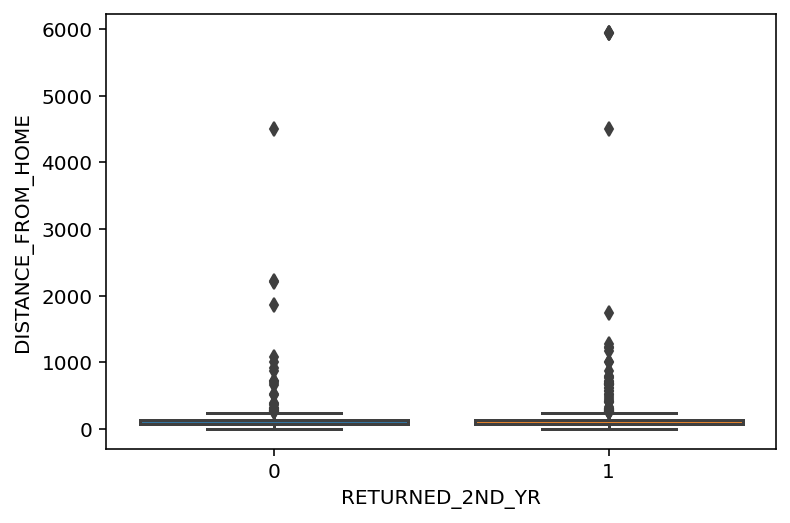

In [324]:
sns.boxplot(x="RETURNED_2ND_YR", y="DISTANCE_FROM_HOME", data=data2)

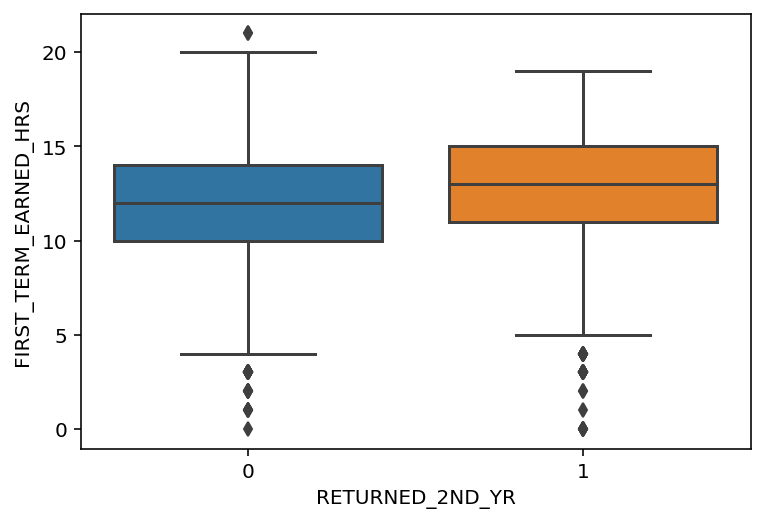

In [325]:
sns.boxplot(x="RETURNED_2ND_YR", y="FIRST_TERM_EARNED_HRS", data=data2)

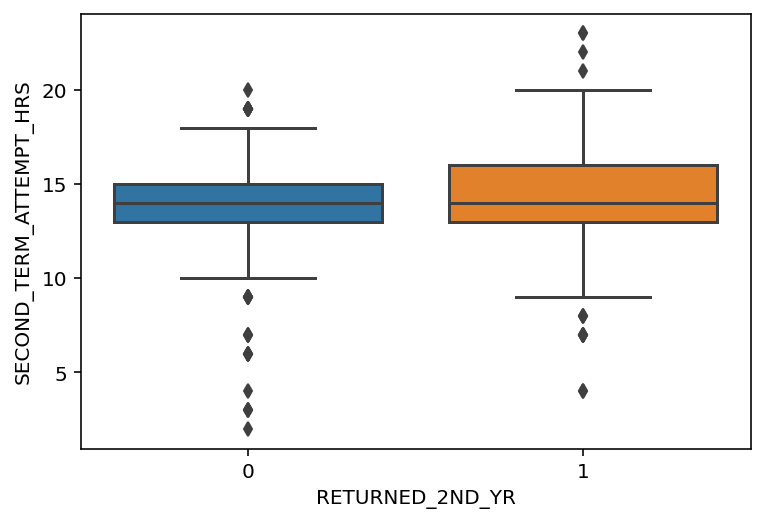

In [326]:
sns.boxplot(x="RETURNED_2ND_YR", y="SECOND_TERM_ATTEMPT_HRS", data=data2)

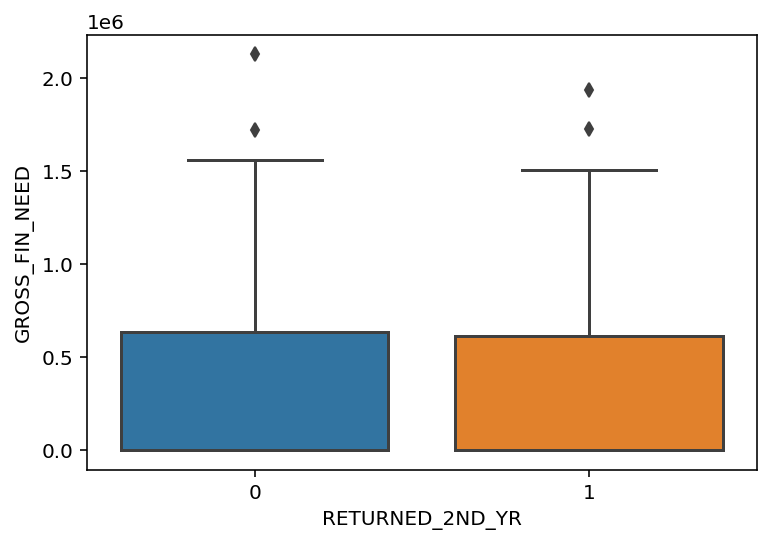

In [327]:
sns.boxplot(x="RETURNED_2ND_YR", y="GROSS_FIN_NEED", data=data2)

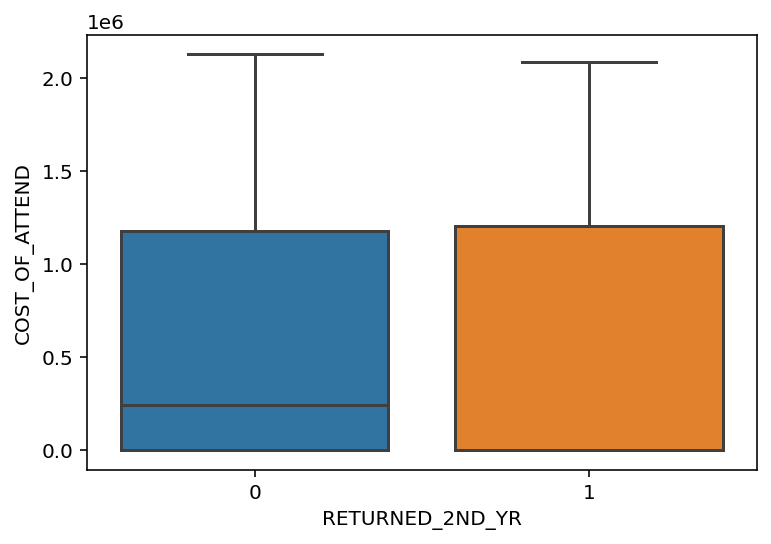

In [328]:
sns.boxplot(x="RETURNED_2ND_YR", y="COST_OF_ATTEND", data=data2)

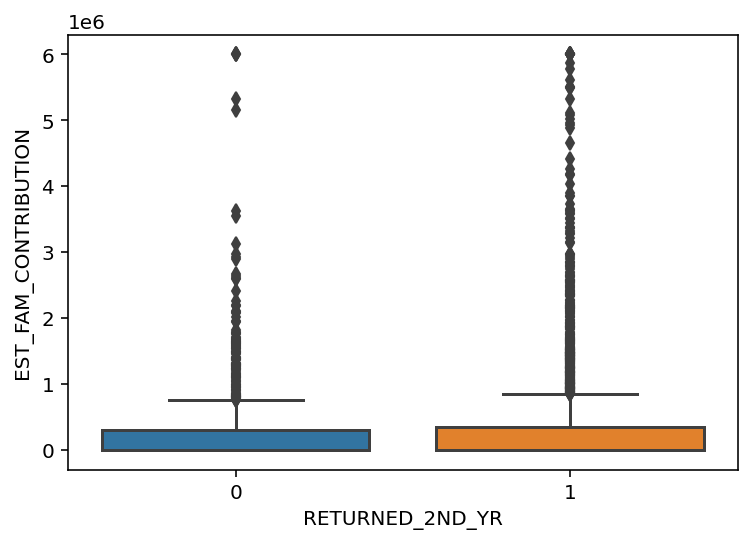

In [329]:
sns.boxplot(x="RETURNED_2ND_YR", y="EST_FAM_CONTRIBUTION", data=data2)

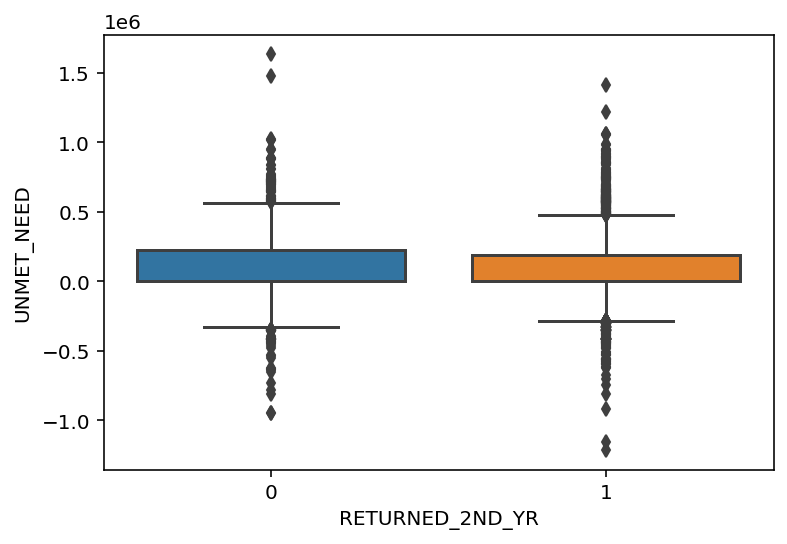

In [330]:
sns.boxplot(x="RETURNED_2ND_YR", y="UNMET_NEED", data=data2)

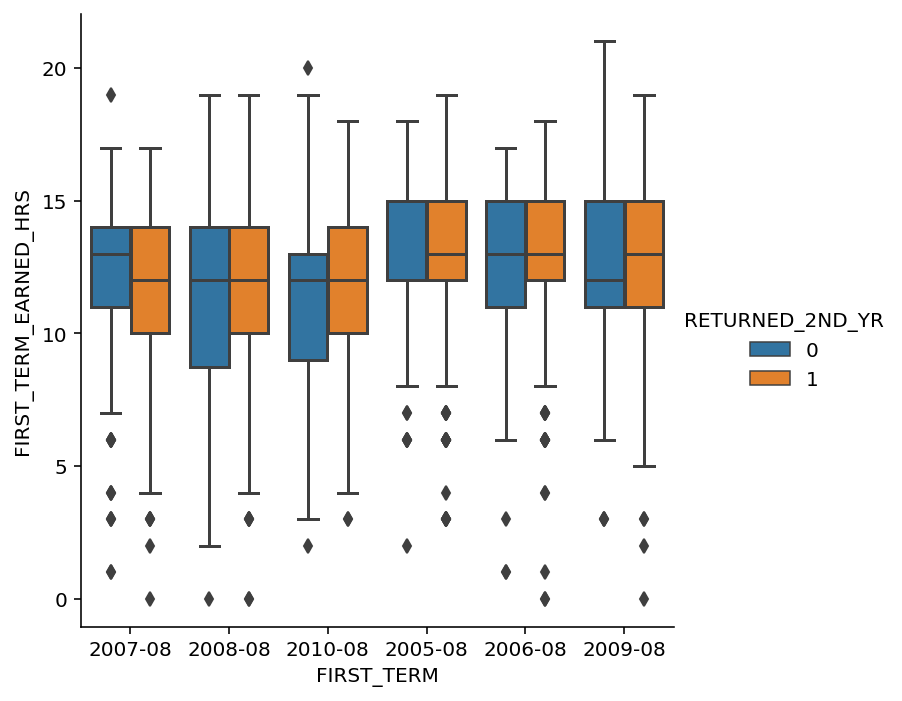

In [331]:
sns.catplot(x="FIRST_TERM", y="FIRST_TERM_EARNED_HRS", hue="RETURNED_2ND_YR", kind="box", data=data2)

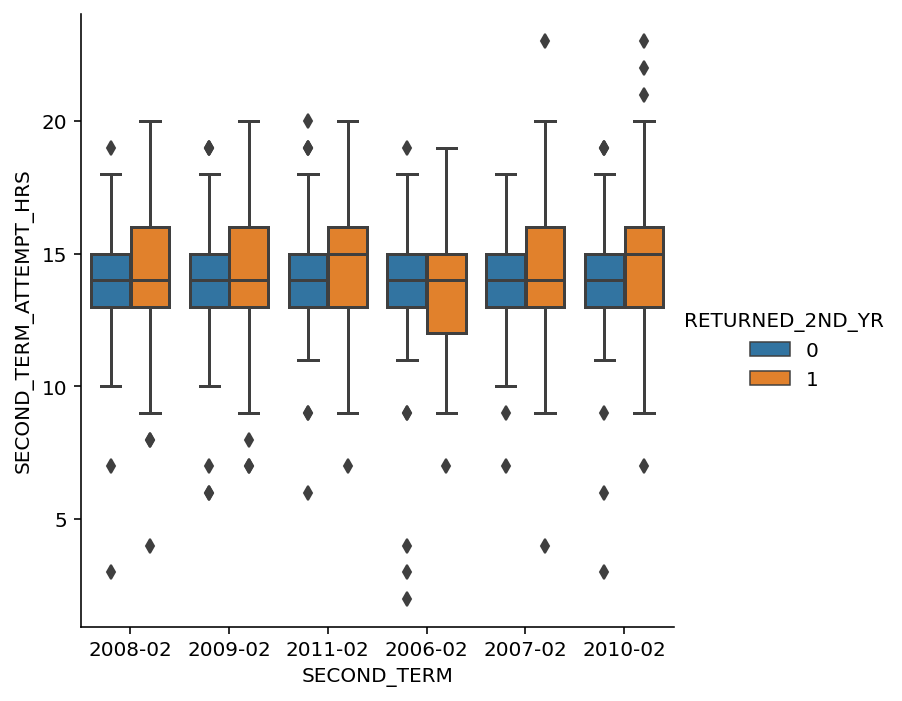

In [332]:
sns.catplot(x="SECOND_TERM", y="SECOND_TERM_ATTEMPT_HRS", hue="RETURNED_2ND_YR", kind="box", data=data2)

Text(0, 0.5, 'Proportion of students')

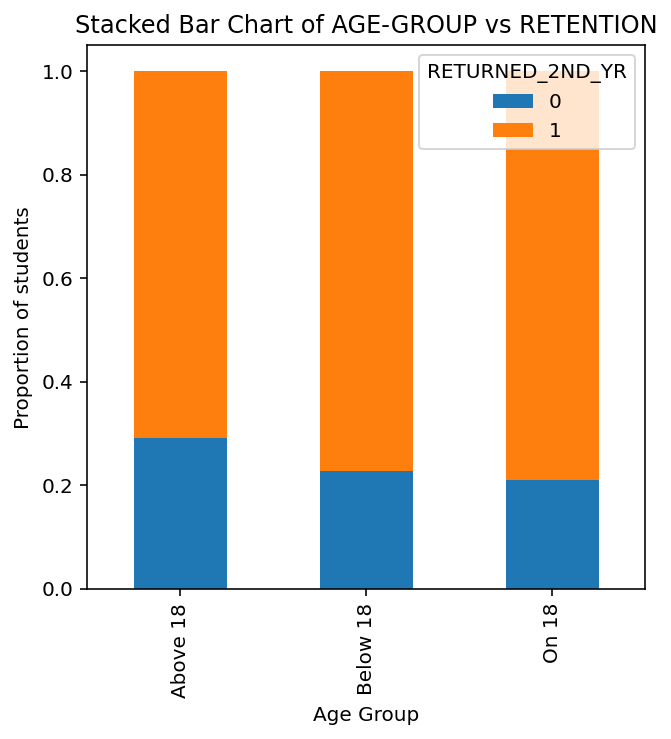

In [333]:
t1=pd.crosstab(data2.age_group,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.title('Stacked Bar Chart of AGE-GROUP vs RETENTION')
plt.xlabel('Age Group')
plt.ylabel('Proportion of students')

In [26]:
#Keeping only 2 categories , above & below 18 : 
cdata['age_group']=np.where(cdata['STDNT_AGE']<=18,'18 & below','Above 18')

Text(0, 0.5, 'Proportion of students')

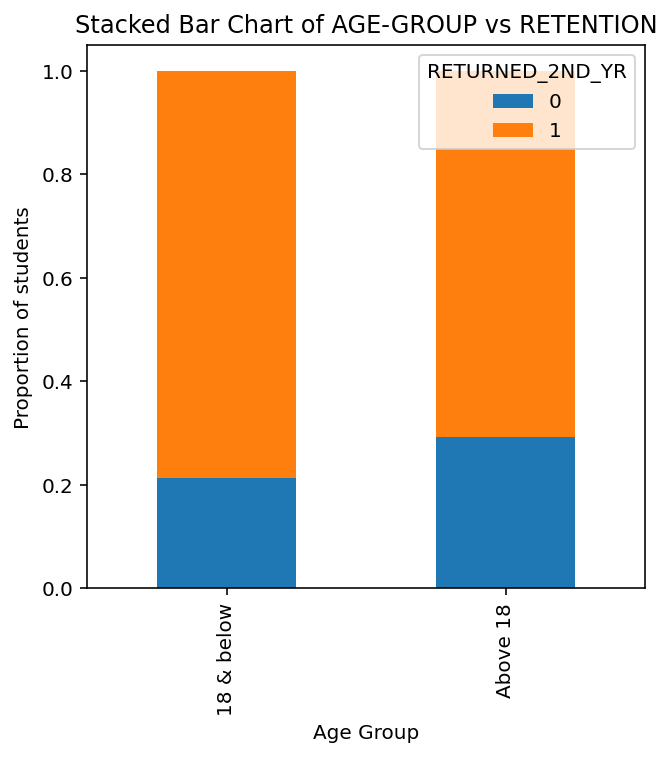

In [270]:
t1=pd.crosstab(data2.age_group,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.title('Stacked Bar Chart of AGE-GROUP vs RETENTION')
plt.xlabel('Age Group')
plt.ylabel('Proportion of students')

In [460]:
cdata['age_group'].value_counts()

18 & below    3103
Above 18       216
Name: age_group, dtype: int64

In [182]:
report=dataQuality(data2)


Text(0, 0.5, 'Proportion of students')

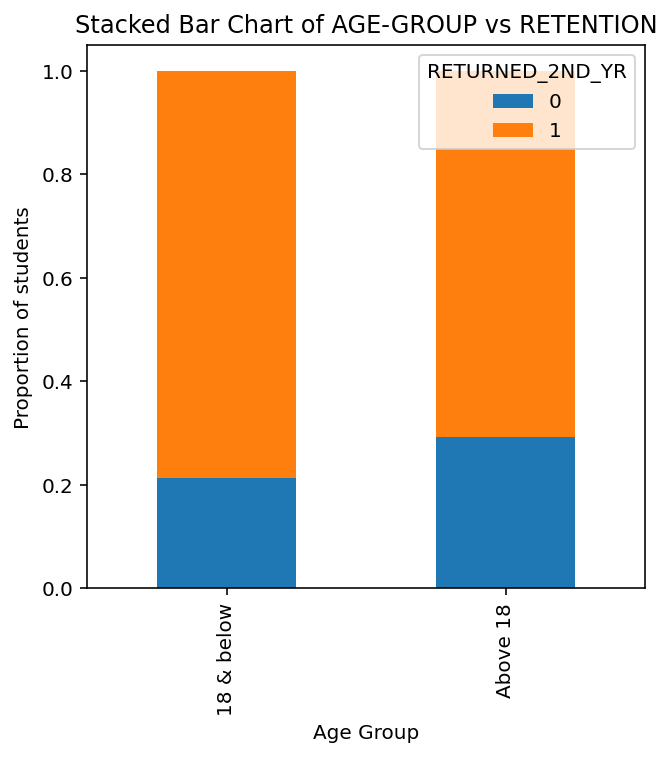

In [335]:
t1=pd.crosstab(data2.age_group,data2.RETURNED_2ND_YR)
t1.div(t1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.title('Stacked Bar Chart of AGE-GROUP vs RETENTION')
plt.xlabel('Age Group')
plt.ylabel('Proportion of students')

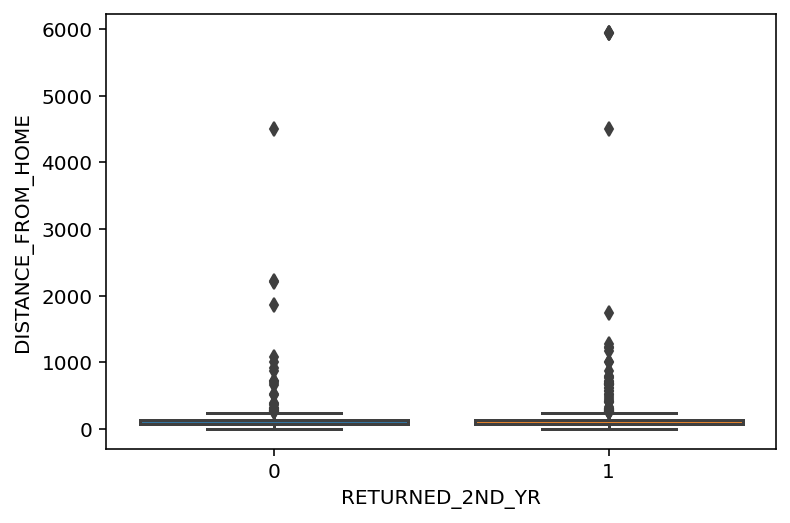

In [336]:
sns.boxplot(x="RETURNED_2ND_YR", y="DISTANCE_FROM_HOME", data=data2)

In [27]:
cdata=cdata.loc[cdata['DISTANCE_FROM_HOME']<=1500]

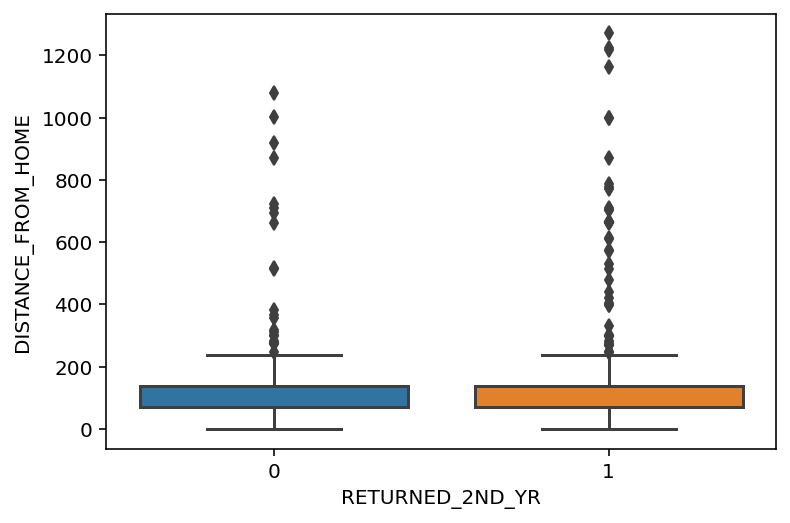

In [338]:
sns.boxplot(x="RETURNED_2ND_YR", y="DISTANCE_FROM_HOME", data=data2)

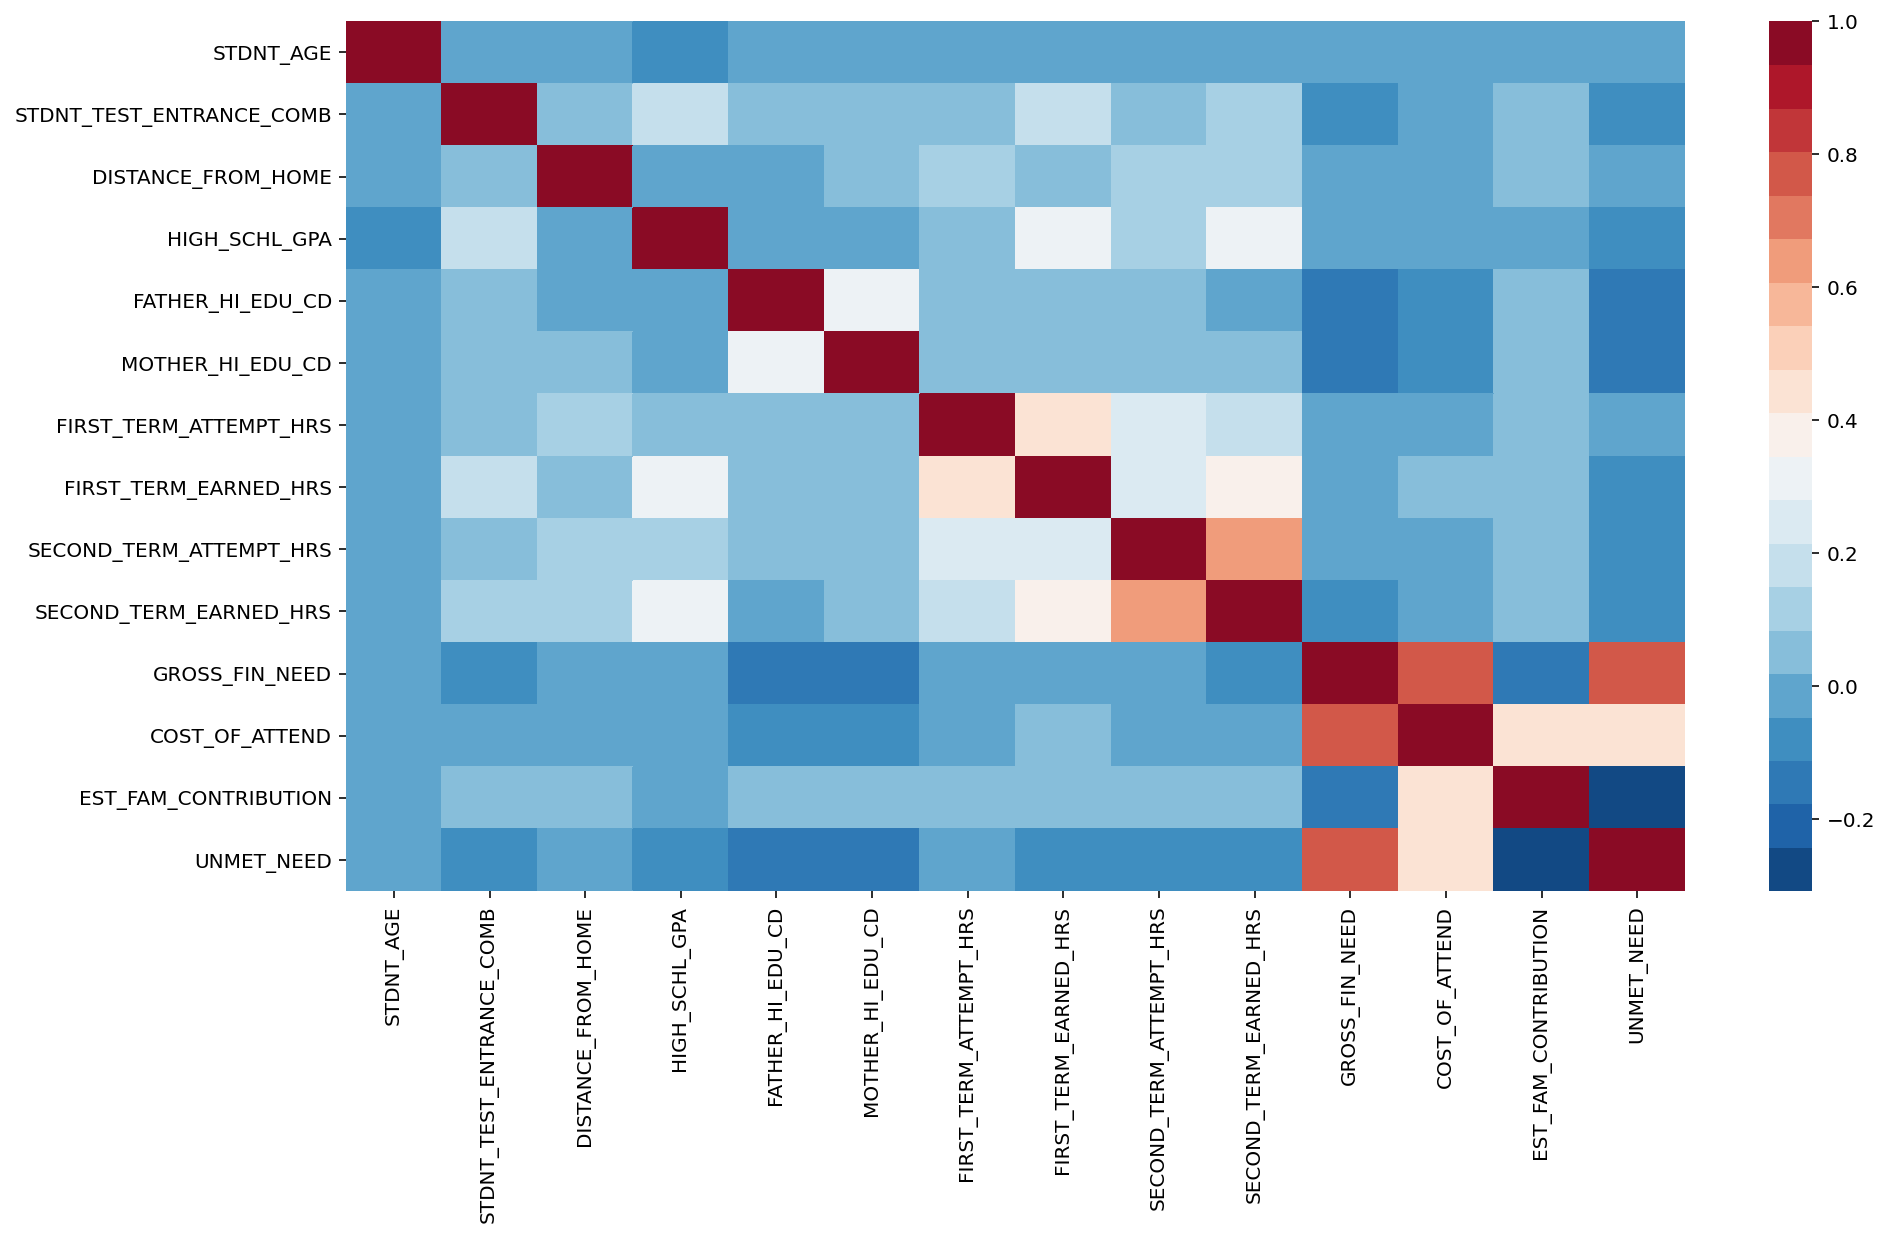

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# create correlation in dataframe
corr = cdata[cdata.columns[1:]].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 20));

In [28]:
cdata='data4'

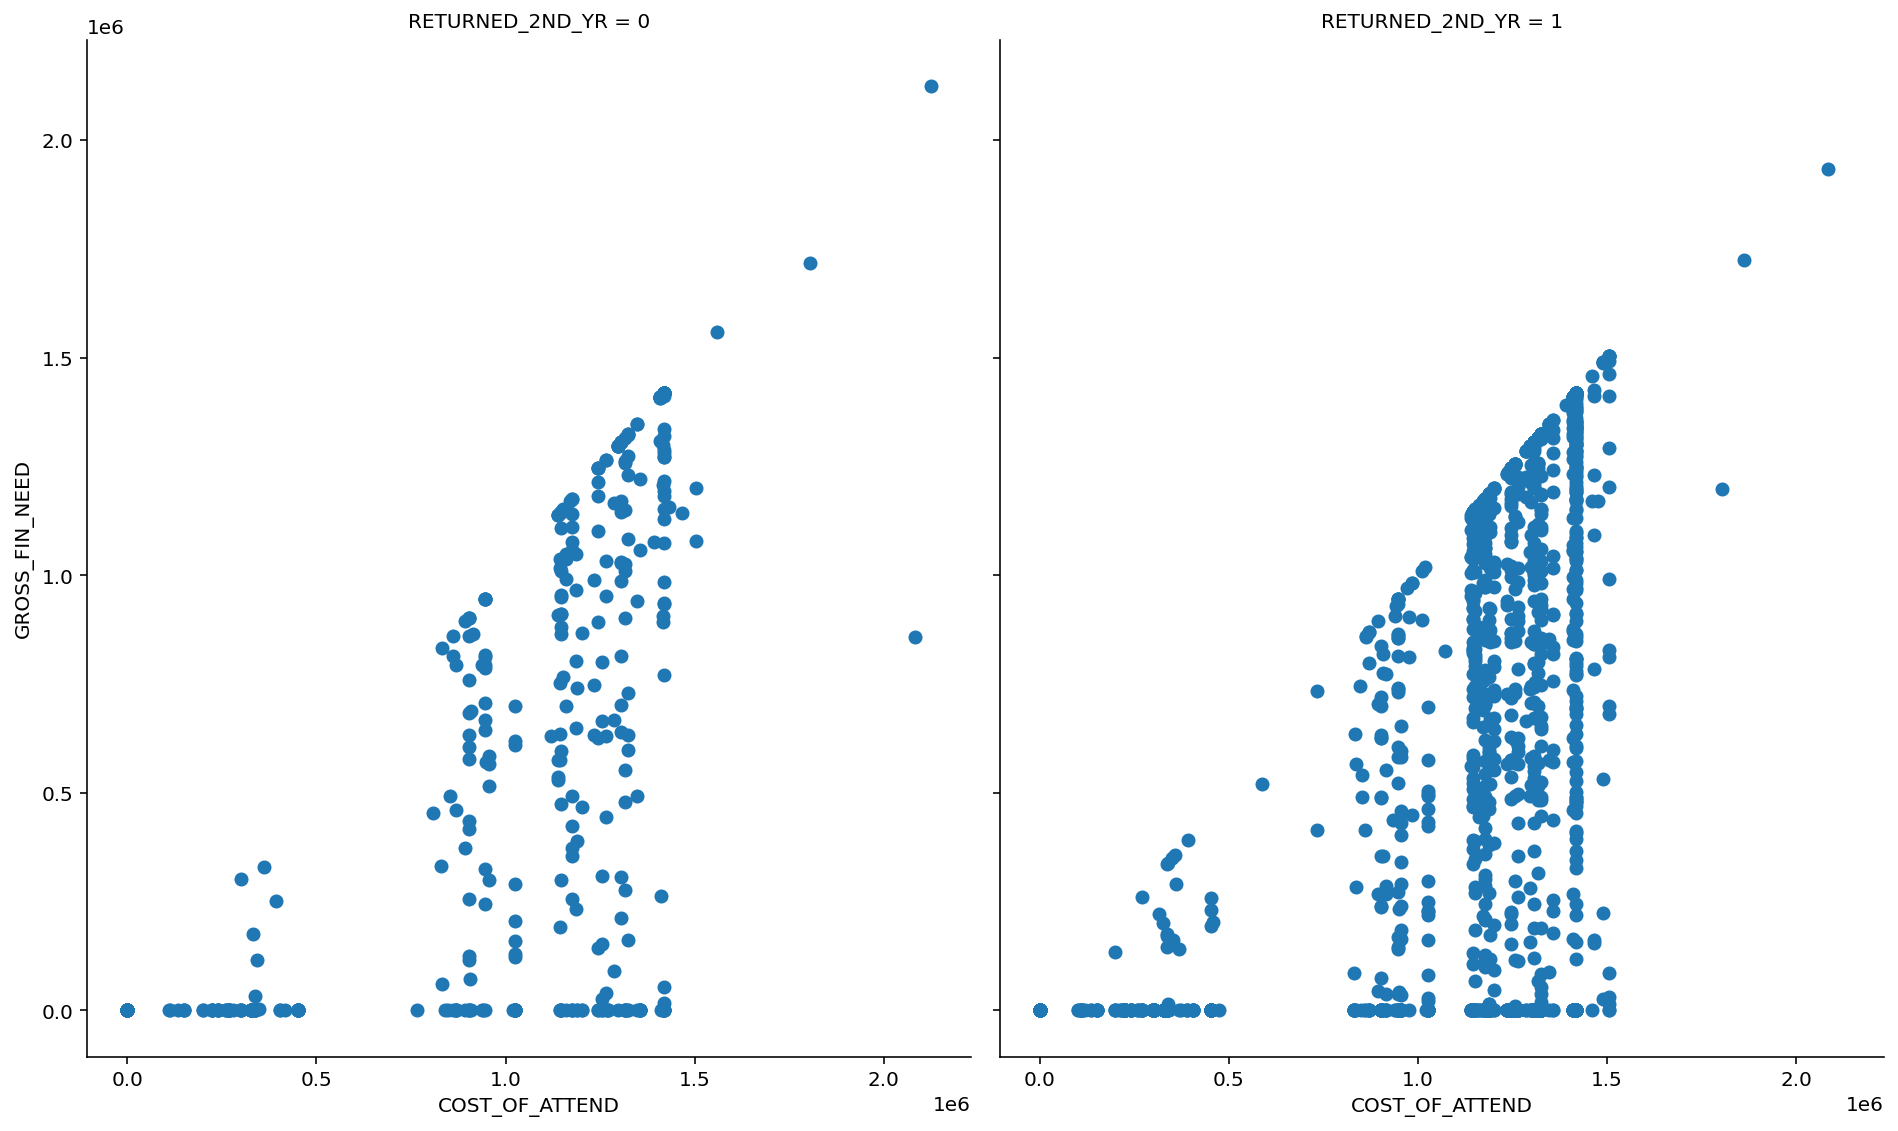

In [468]:
sns.FacetGrid(col='RETURNED_2ND_YR',col_wrap=10,aspect=.8,size=8,data=cdata).map(plt.scatter,'COST_OF_ATTEND','GROSS_FIN_NEED')

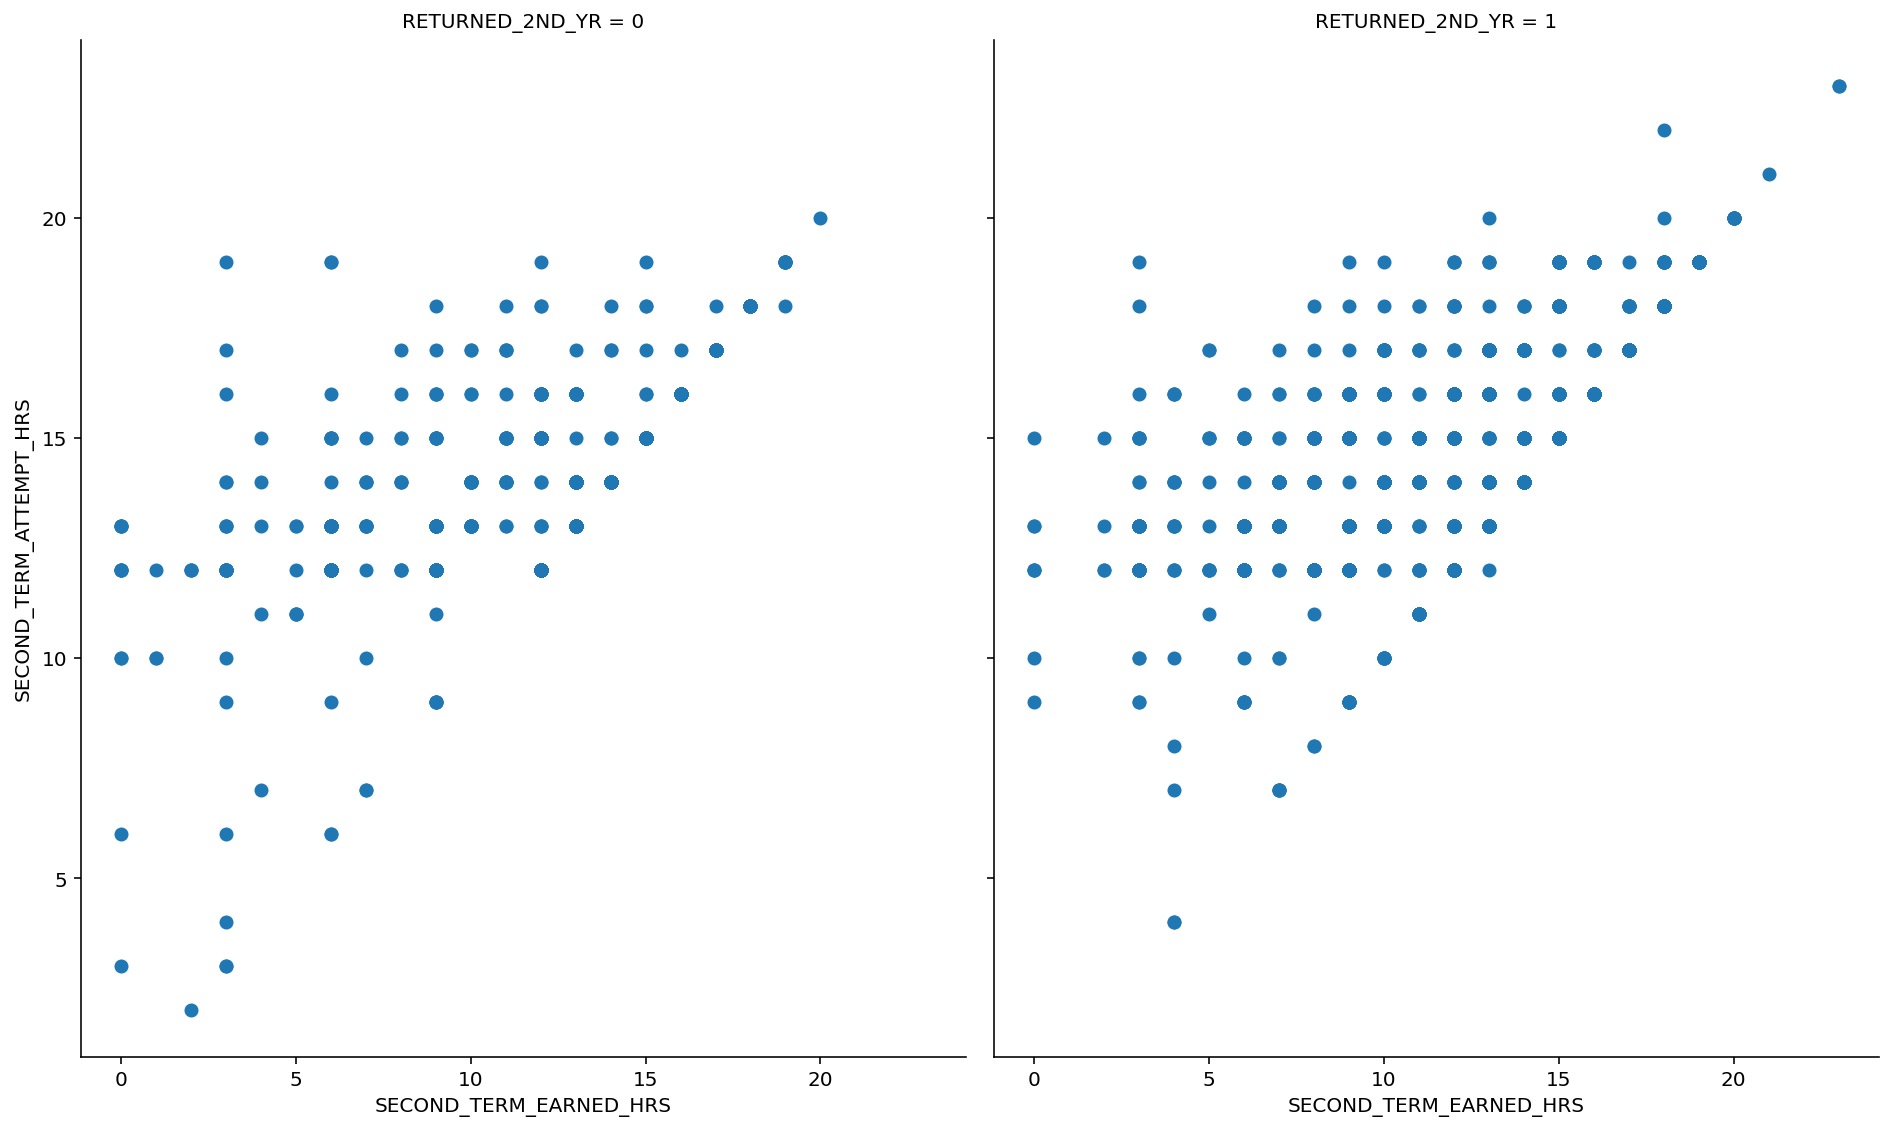

In [470]:
sns.FacetGrid(col='RETURNED_2ND_YR',col_wrap=10,aspect=.8,size=8,data=cdata).map(plt.scatter,'SECOND_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS')

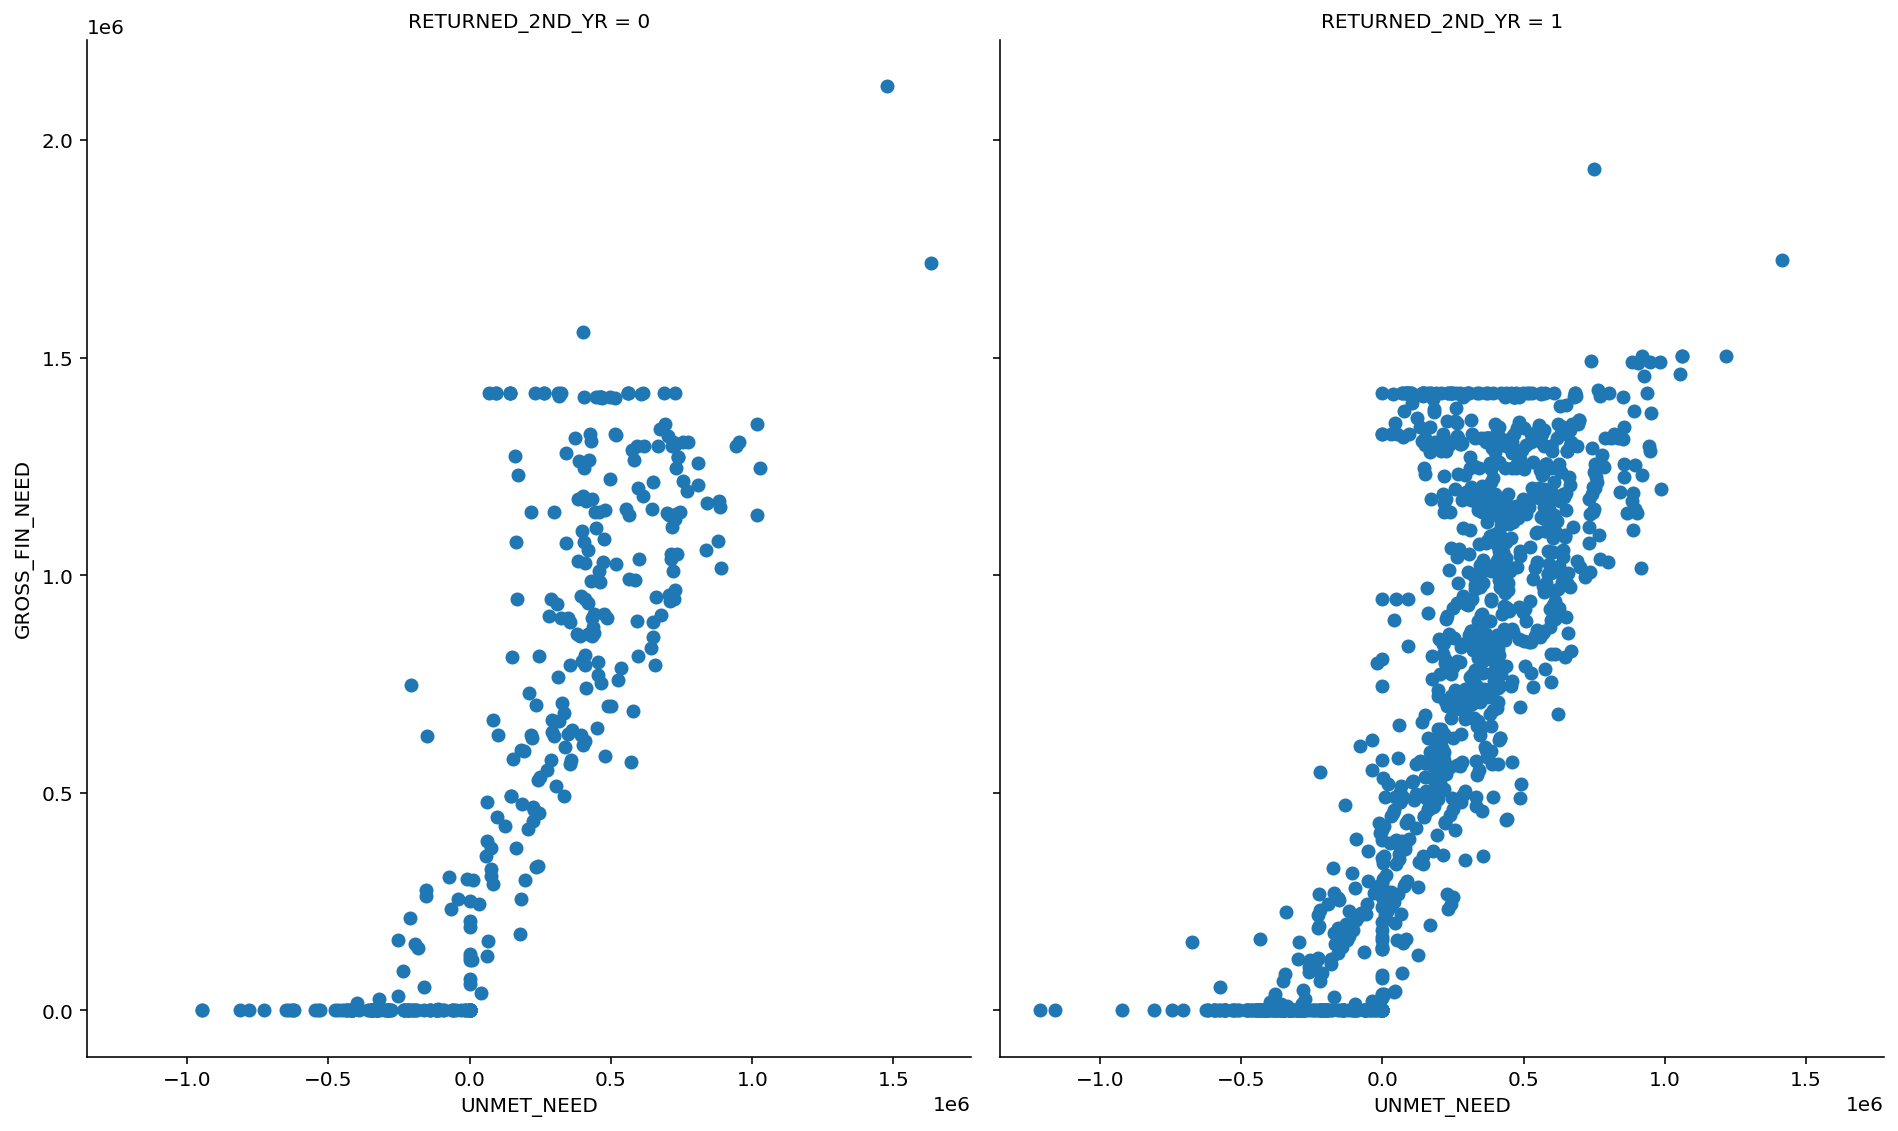

In [472]:
sns.FacetGrid(col='RETURNED_2ND_YR',col_wrap=10,aspect=.8,size=8,data=cdata).map(plt.scatter,'UNMET_NEED','GROSS_FIN_NEED')

In [31]:
def boxplot_outlier_removal(X, exclude=['']):
    '''
    remove outliers detected by boxplot (Q1/Q3 -/+ IQR*1.5)

    Parameters
    ----------
    X : dataframe
      dataset to remove outliers from
    exclude : list of str
      column names to exclude from outlier removal

    Returns
    -------
    X : dataframe
      dataset with outliers removed
    '''
    before = len(X)

    # iterate each column
    for col in X.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (X[col] > Q1 - 1.5 * IQR) & (X[col] < Q3 + 1.5 *IQR)
            X = X[filter_]

    after = len(X)
    diff = before-after
    percent = diff/before*100
    print('{} ({:.2f}%) outliers removed'.format(diff, percent))
    return X

In [32]:
exclude_list=['STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','STDNT_MINOR',
              'FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F',
              'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F','SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S',
                'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S','HOUSING_STS','RETURNED_2ND_YR',
              'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','age_group','CORE_COURSE_NAME_1_F_GROUPED',
              'CORE_COURSE_NAME_2_F_GROUPED','CORE_COURSE_NAME_3_F_GROUPED','CORE_COURSE_NAME_1_S_GROUPED',
              'CORE_COURSE_NAME_2_S_GROUPED','STDNT_AGE','RETURNED_2ND_YR','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD']

In [475]:
cdata.shape

(3310, 43)

In [476]:
cdata

,Unnamed: 0,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,...,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,AGE_GROUP,CORE_COURSE_NAME_1_F_GROUPED,CORE_COURSE_NAME_2_F_GROUPED,CORE_COURSE_NAME_3_F_GROUPED,CORE_COURSE_NAME_1_S_GROUPED,CORE_COURSE_NAME_2_S_GROUPED,age_group
0,0,18,F,BGD 1,Y,Undeclared,No,1150,2007-08,ANTH 1105,...,0,0,0.0,On 18,ANTH,ARTH,ENGL,CHEM,CHEM,18 & below
1,1,19,F,BGD 1,N,Undeclared,No,1190,2008-08,ANTH 1105,...,1355760,785760,459300.0,Above 18,ANTH,GERM,ITDS,ECON,ENGL,Above 18
2,2,18,M,BGD 1,Y,Mathematics,No,1030,2010-08,ANTH 1105,...,0,0,0.0,On 18,ANTH,ENGL,HIST,ENGL,ENVS,18 & below
3,3,18,M,BGD 1,Y,Undeclared,No,1220,2007-08,ANTH 1107,...,0,0,0.0,On 18,ANTH,COMM,ENGL,ENGL,HIST,18 & below
4,4,18,F,BGD 1,Y,Art,No,1190,2008-08,ANTH 1107,...,1355760,519840,278340.0,On 18,ANTH,ARTH,CPSC,COMM,ENGL,18 & below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,3394,18,F,BGD 1,Y,Theatre Arts,No,990,2010-08,ENGL 1101,...,0,0,0.0,On 18,ENGL,PSYC,ENGL,ENGL,ENGL,18 & below
3395,3395,18,F,BGD 4,N,Music Performance,No,790,2008-08,COMM 1110,...,0,0,0.0,On 18,COMM,ENGL,ENGL,ENGL,ENGL,18 & below
3396,3396,18,F,BGD 1,Y,Biology,No,950,2007-08,POLS 1101,...,0,0,0.0,On 18,POLS,ENGL,ENGL,POLS,ENGL,18 & below
3397,3397,18,F,BGD 4,Y,Biology,No,1030,2008-08,ENGL 1101,...,945840,1288980,0.0,On 18,ENGL,ENGL,ENGL,ENGL,ENGL,18 & below


In [35]:
cdata.drop('AGE_GROUP',axis=1)

AttributeError: 'str' object has no attribute 'drop'

In [33]:
d1=pd.read_excel('Cleaned_Data.xlsx')

In [34]:
a1=boxplot_outlier_removal(d1,exclude_list)

1041 (30.62%) outliers removed
